# Importing Libraries

In [1]:
import numpy as np
from datetime import date, timedelta, datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Joining Datasets

In [2]:
path = r'C:\Users\sacni\Courses\TechStack\Prashant Sir\ML\COVID-19 Project\csse_covid_19_daily_reports' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

# Data Pre-Processing

In [3]:
frame = data.copy()

In [4]:
frame.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-01-02 05:22:33  33.93911   
1   NaN    NaN            NaN        Albania  2021-01-02 05:22:33  41.15330   
2   NaN    NaN            NaN        Algeria  2021-01-02 05:22:33  28.03390   
3   NaN    NaN            NaN        Andorra  2021-01-02 05:22:33  42.50630   
4   NaN    NaN            NaN         Angola  2021-01-02 05:22:33 -11.20270   

       Long_  Confirmed  Deaths  Recovered  ...  Combined_Key Incident_Rate  \
0  67.709953    51526.0  2191.0    41727.0  ...   Afghanistan      0.000000   
1  20.168300    58316.0  1181.0    33634.0  ...       Albania   2026.409062   
2   1.659600    99897.0  2762.0    67395.0  ...       Algeria    227.809861   
3   1.521800     8117.0    84.0     7463.0  ...       Andorra  10505.403482   
4  17.873900    17568.0   405.0    11146.0  ...        Angola     53.452981   

   Case_Fatality_Ratio Province/State Country/Region Last Update Latitude  \
0             4.252222            NaN            NaN         NaN      NaN   
1             2.025173            NaN            NaN         NaN      NaN   
2             2.764848            NaN            NaN         NaN      NaN   
3             1.034865            NaN            NaN         NaN      NaN   
4             2.305328            NaN            NaN         NaN      NaN   

   Longitude  Incidence_Rate  Case-Fatality_Ratio  
0        NaN             NaN                  NaN  
1        NaN             NaN                  NaN  
2        NaN             NaN                  NaN  
3        NaN             NaN                  NaN  
4        NaN             NaN                  NaN  

[5 rows x 21 columns]

In [5]:
frame.shape

(1182267, 21)

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182267 entries, 0 to 1182266
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   FIPS                 983865 non-null   float64
 1   Admin2               985618 non-null   object 
 2   Province_State       1120994 non-null  object 
 3   Country_Region       1174650 non-null  object 
 4   Last_Update          1174650 non-null  object 
 5   Lat                  1151132 non-null  float64
 6   Long_                1151132 non-null  float64
 7   Confirmed            1182248 non-null  float64
 8   Deaths               1181835 non-null  float64
 9   Recovered            1181881 non-null  float64
 10  Active               1174118 non-null  float64
 11  Combined_Key         1174650 non-null  object 
 12  Incident_Rate        315051 non-null   float64
 13  Case_Fatality_Ratio  318626 non-null   object 
 14  Province/State       4358 non-null     object 
 15

In [7]:
frame[frame==0].count()

FIPS                         0
Admin2                       0
Province_State               0
Country_Region               0
Last_Update                  0
Lat                        370
Long_                      370
Confirmed                29741
Deaths                  299163
Recovered              1015411
Active                   82359
Combined_Key                 0
Incident_Rate              168
Case_Fatality_Ratio      21276
Province/State               0
Country/Region               0
Last Update                  0
Latitude                     0
Longitude                    0
Incidence_Rate            2292
Case-Fatality_Ratio     144119
dtype: int64

In [8]:
frame[frame["Lat"]==0].nunique()

FIPS                     2
Admin2                   5
Province_State          43
Country_Region           5
Last_Update             28
Lat                      1
Long_                    1
Confirmed              120
Deaths                  39
Recovered               21
Active                   8
Combined_Key            53
Incident_Rate            0
Case_Fatality_Ratio      0
Province/State           0
Country/Region           0
Last Update              0
Latitude                 0
Longitude                0
Incidence_Rate           0
Case-Fatality_Ratio      0
dtype: int64

In [9]:
frame.isnull().sum()

FIPS                    198402
Admin2                  196649
Province_State           61273
Country_Region            7617
Last_Update               7617
Lat                      31135
Long_                    31135
Confirmed                   19
Deaths                     432
Recovered                  386
Active                    8149
Combined_Key              7617
Incident_Rate           867216
Case_Fatality_Ratio     863641
Province/State         1177909
Country/Region         1174650
Last Update            1174650
Latitude               1177468
Longitude              1177468
Incidence_Rate          557829
Case-Fatality_Ratio     553246
dtype: int64

In [10]:
percent_missing = frame.isnull().sum() * 100 / len(frame)
missing_value_df = pd.DataFrame({'column_name': frame.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
FIPS                                FIPS        16.781488
Admin2                            Admin2        16.633214
Province_State            Province_State         5.182670
Country_Region            Country_Region         0.644271
Last_Update                  Last_Update         0.644271
Lat                                  Lat         2.633500
Long_                              Long_         2.633500
Confirmed                      Confirmed         0.001607
Deaths                            Deaths         0.036540
Recovered                      Recovered         0.032649
Active                            Active         0.689269
Combined_Key                Combined_Key         0.644271
Incident_Rate              Incident_Rate        73.351959
Case_Fatality_Ratio  Case_Fatality_Ratio        73.049573
Province/State            Province/State        99.631386
Country/Region            Country/Region        99.355729
Last Update                  Last Update        99.355729
Latitude                        Latitude        99.594085
Longitude                      Longitude        99.594085
Incidence_Rate            Incidence_Rate        47.182997
Case-Fatality_Ratio  Case-Fatality_Ratio        46.795352

In [11]:
frame.drop(['FIPS', 'Admin2', 'Incident_Rate', 'Case_Fatality_Ratio',
       'Province/State', 'Country/Region', 'Last Update', 'Latitude',
       'Longitude', 'Incidence_Rate', 'Case-Fatality_Ratio','Combined_Key'], axis=1, inplace=True)

In [12]:
frame.nunique()

Province_State      581
Country_Region      193
Last_Update        1038
Lat                4051
Long_              4107
Confirmed         71095
Deaths            12118
Recovered         46561
Active            49852
dtype: int64

In [13]:
frame.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active'],
      dtype='object')

In [14]:
frame = frame[frame['Country_Region'].notna()]

In [15]:
frame['Province_State']=frame['Province_State'].mask(pd.isnull, frame['Country_Region'])

In [16]:
m = frame['Lat'] != 0
s = frame[m].groupby(['Country_Region','Province_State'])['Lat'].mean()
frame.loc[~m, 'Lat'] = frame['Province_State'].map(s)

In [17]:
n = frame['Long_'] != 0
t = frame[n].groupby(['Country_Region','Province_State'])['Long_'].mean()
frame.loc[~n, 'Long_'] = frame['Province_State'].map(t)

In [18]:
frame['Lat'] = frame.groupby(['Country_Region','Province_State']).Lat.transform(lambda x: x.fillna(x.mean()))
frame['Long_'] = frame.groupby(['Country_Region','Province_State']).Long_.transform(lambda x: x.fillna(x.mean()))
frame['Deaths'] = frame.groupby(['Country_Region','Province_State']).Deaths.transform(lambda x: x.fillna(x.median()))
frame['Recovered'] = frame.groupby(['Country_Region','Province_State']).Recovered.transform(lambda x: x.fillna(x.median()))
frame['Active'] = frame.groupby(['Country_Region','Province_State']).Active.transform(lambda x: x.fillna(x.median()))

In [19]:
frame['Lat'] = frame.groupby(['Country_Region']).Lat.transform(lambda x: x.fillna(x.mean()))
frame['Long_'] = frame.groupby(['Country_Region']).Long_.transform(lambda x: x.fillna(x.mean()))

In [20]:
frame = frame[frame['Lat'].notna()]

# Data Visualization

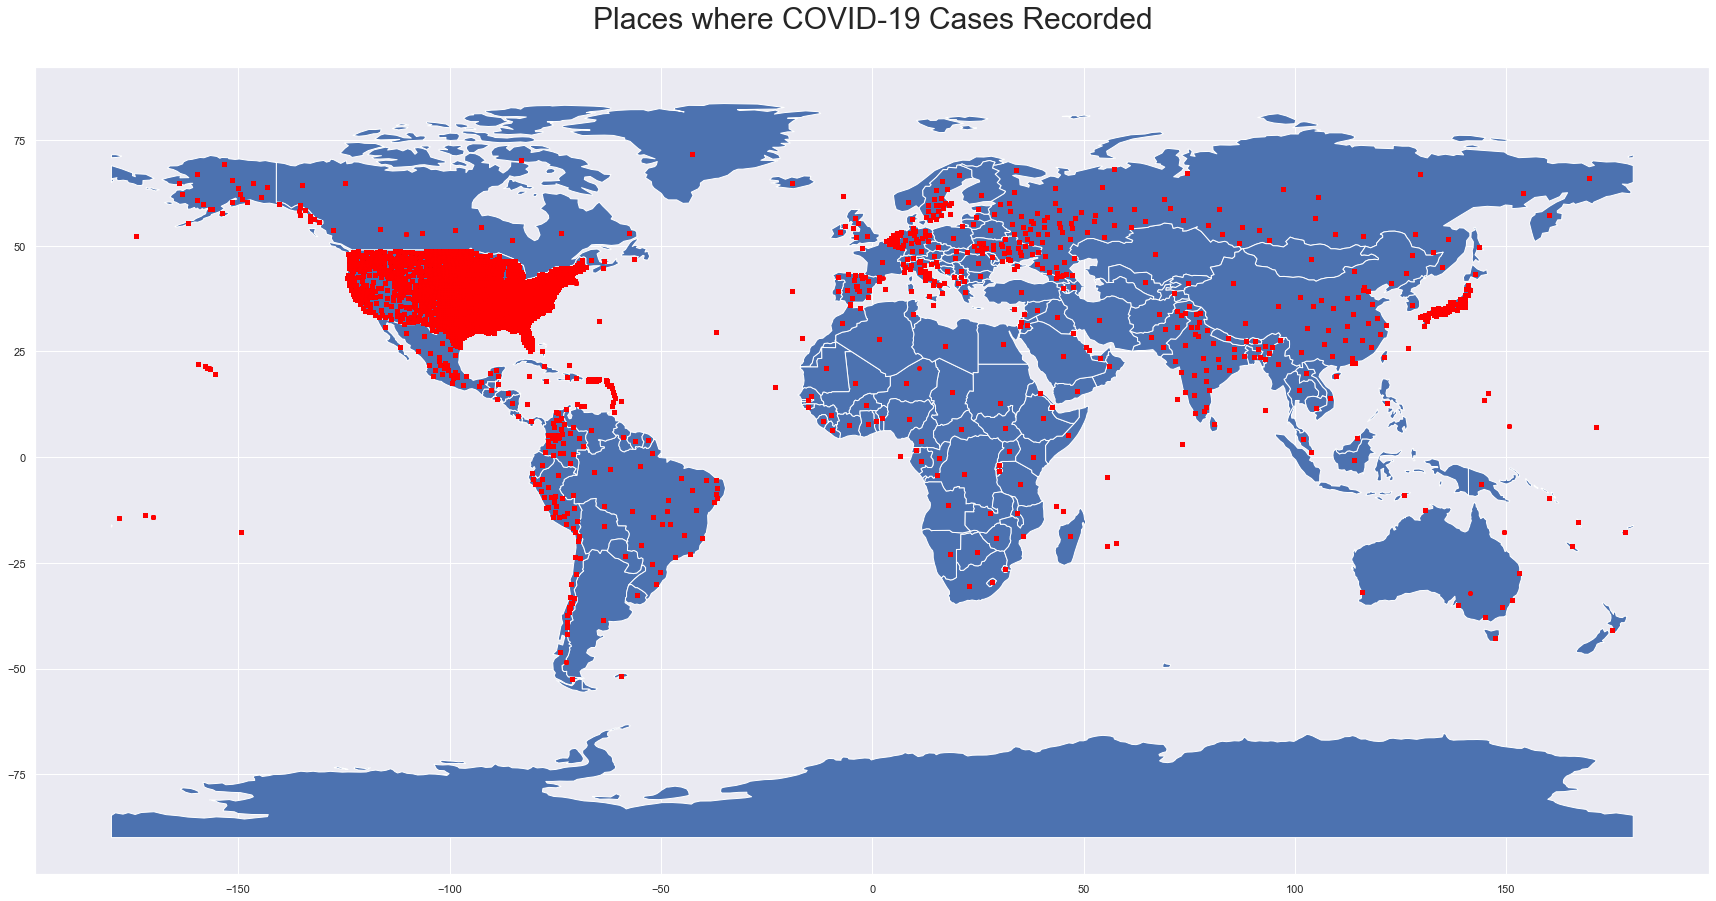

In [21]:
geometry = [Point(xy) for xy in zip(frame['Long_'], frame['Lat'])]
gdf = GeoDataFrame(frame, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
sns.set(style="darkgrid")
gdf.plot(ax=world.plot(figsize=(30,15)), marker='o', color='red', markersize=15)
plt.title("Places where COVID-19 Cases Recorded\n", size=30);

In [22]:
frame['Last_Update'] = pd.to_datetime(frame['Last_Update'])

In [23]:
frame.dtypes

Province_State            object
Country_Region            object
Last_Update       datetime64[ns]
Lat                      float64
Long_                    float64
Confirmed                float64
Deaths                   float64
Recovered                float64
Active                   float64
geometry                geometry
dtype: object

In [24]:
frame['Date'] = pd.to_datetime(frame['Last_Update']).dt.to_period('D')
frame["Month"] = pd.DatetimeIndex(frame['Last_Update']).month
frame["Year"] = pd.DatetimeIndex(frame['Last_Update']).year
frame['Date'] = frame['Date'].astype(str)
frame['Date'] = pd.to_datetime(frame['Date'])
frame['month_year'] = pd.to_datetime(frame['Last_Update']).dt.to_period('M')

In [25]:
frame_asc = frame.sort_values(['Last_Update','Country_Region','Province_State'], ascending = (True))
frame_dsc = frame.sort_values(['Last_Update','Country_Region','Province_State'], ascending = (False))

In [26]:
frame_asc.head()

Province_State Country_Region         Last_Update      Lat    Long_  \
122226        Qinghai          China 2020-02-23 11:19:00  35.7452  95.9956   
142752        Qinghai          China 2020-02-23 11:19:00  35.7452  95.9956   
146188        Qinghai          China 2020-02-23 11:19:00  35.7452  95.9956   
149628        Qinghai          China 2020-02-23 11:19:00  35.7452  95.9956   
157116        Qinghai          China 2020-02-23 11:19:00  35.7452  95.9956   

        Confirmed  Deaths  Recovered  Active                   geometry  \
122226       18.0     0.0       18.0     0.0  POINT (95.99560 35.74520)   
142752       18.0     0.0       18.0     0.0  POINT (95.99560 35.74520)   
146188       18.0     0.0       18.0     0.0  POINT (95.99560 35.74520)   
149628       18.0     0.0       18.0     0.0  POINT (95.99560 35.74520)   
157116       18.0     0.0       18.0     0.0  POINT (95.99560 35.74520)   

             Date  Month  Year month_year  
122226 2020-02-23      2  2020    2020-02  
142752 2020-02-23      2  2020    2020-02  
146188 2020-02-23      2  2020    2020-02  
149628 2020-02-23      2  2020    2020-02  
157116 2020-02-23      2  2020    2020-02

In [27]:
frame_dsc.head()

Province_State      Country_Region         Last_Update        Lat  \
111694            Zimbabwe            Zimbabwe 2021-01-29 05:22:23 -19.015438   
111693              Zambia              Zambia 2021-01-29 05:22:23 -13.133897   
111692               Yemen               Yemen 2021-01-29 05:22:23  15.552727   
111691  West Bank and Gaza  West Bank and Gaza 2021-01-29 05:22:23  31.952200   
111690             Vietnam             Vietnam 2021-01-29 05:22:23  14.058324   

             Long_  Confirmed  Deaths  Recovered  Active  \
111694   29.154857    32646.0  1160.0    24419.0  7067.0   
111693   27.849332    50319.0   705.0    42771.0  6843.0   
111692   48.516388     2120.0   615.0     1425.0    80.0   
111691   35.233200   157593.0  1812.0   147620.0  8161.0   
111690  108.277199     1651.0    35.0     1430.0   186.0   

                          geometry       Date  Month  Year month_year  
111694  POINT (29.15486 -19.01544) 2021-01-29      1  2021    2021-01  
111693  POINT (27.84933 -13.13390) 2021-01-29      1  2021    2021-01  
111692   POINT (48.51639 15.55273) 2021-01-29      1  2021    2021-01  
111691   POINT (35.23320 31.95220) 2021-01-29      1  2021    2021-01  
111690  POINT (108.27720 14.05832) 2021-01-29      1  2021    2021-01

In [28]:
temp = pd.DataFrame((frame.groupby(['Province_State']).Date.agg([max])).reset_index())
temp

Province_State        max
0            Abruzzo 2021-01-29
1               Acre 2021-01-29
2    Adygea Republic 2021-01-29
3        Afghanistan 2021-01-29
4     Aguascalientes 2021-01-29
..               ...        ...
759          Zeeland 2021-01-29
760         Zhejiang 2021-01-29
761  Zhytomyr Oblast 2021-01-29
762         Zimbabwe 2021-01-29
763     Zuid-Holland 2021-01-29

[764 rows x 2 columns]

In [29]:
Province = pd.DataFrame()
Province['Province_State'] = temp['Province_State']
Province['Date'] = temp['max']

In [30]:
Province.head()

Province_State       Date
0          Abruzzo 2021-01-29
1             Acre 2021-01-29
2  Adygea Republic 2021-01-29
3      Afghanistan 2021-01-29
4   Aguascalientes 2021-01-29

In [31]:
df = frame.merge(Province, on=['Province_State','Date'])

In [32]:
df = df.drop_duplicates()

In [33]:
df['Province_State'].nunique()

764

In [34]:
df.shape

(3988, 14)

In [35]:
df.head()

Province_State Country_Region         Last_Update  \
0                   Diamond Princess         Canada 2020-12-21 13:27:30   
28                  Diamond Princess         Canada 2020-12-21 05:27:58   
40                    Grand Princess         Canada 2020-12-21 13:27:30   
68                    Grand Princess         Canada 2020-12-21 05:27:58   
80  Bonaire, Sint Eustatius and Saba    Netherlands 2021-01-08 05:22:42   

          Lat      Long_  Confirmed  Deaths  Recovered  Active  \
0   54.505733 -92.469933        0.0     1.0        0.0     0.0   
28  54.505733 -92.469933        0.0     1.0        0.0     0.0   
40  54.505733 -92.469933       13.0     0.0       13.0     0.0   
68  54.505733 -92.469933       13.0     0.0       13.0     0.0   
80  12.178400 -68.238500      196.0     3.0      180.0    13.0   

                      geometry       Date  Month  Year month_year  
0   POINT (-92.46993 54.50573) 2020-12-21     12  2020    2020-12  
28  POINT (-92.46993 54.50573) 2020-12-21     12  2020    2020-12  
40  POINT (-92.46993 54.50573) 2020-12-21     12  2020    2020-12  
68  POINT (-92.46993 54.50573) 2020-12-21     12  2020    2020-12  
80  POINT (-68.23850 12.17840) 2021-01-08      1  2021    2021-01

In [36]:
pd.set_option('precision', 0)

# Country-wise Cases

In [37]:
full_latest = frame[frame['Date'] == max(frame['Date'])].reset_index()
full_latest_grouped = full_latest.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f[['Country_Region', 'Confirmed', 'Active', 'Deaths', 'Recovered']]
temp_f = temp_f.reset_index(drop=True)

temp_f.style.background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
            .background_gradient(cmap="Greens", subset=['Recovered'])\
            .background_gradient(cmap="Reds", subset=['Deaths'])

<ipython-input-37-094136c5faa5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_latest_grouped = full_latest.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


## Confirmed Cases

In [38]:
# Confirmed
fig = px.choropleth(full_latest_grouped, locations="Country_Region", 
                    locationmode='country names', color=np.log(full_latest_grouped["Confirmed"]), 
                    hover_name="Country_Region", hover_data=['Confirmed'],
                    color_continuous_scale="peach", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

<IPython.core.display.Javascript object>

In [39]:
cnf = pd.DataFrame((df.groupby(['Country_Region']).Confirmed.agg([sum])).reset_index())
top_10_cnf = cnf.sort_values(['sum'], ascending = (False)).head(10)
top_10_cnf['Country_Region'].values

array(['US', 'India', 'Brazil', 'Russia', 'United Kingdom', 'France',
       'Spain', 'Italy', 'Turkey', 'Germany'], dtype=object)

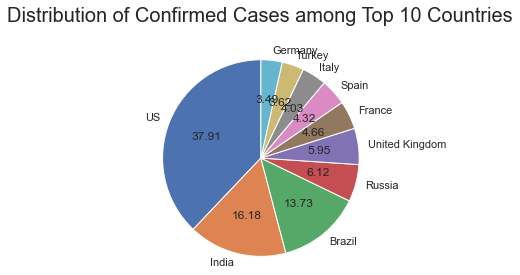

In [40]:
pieLabels = top_10_cnf['Country_Region'].head(10)
populationShare = top_10_cnf['sum'].head(10)
figureObject, axesObject = plt.subplots()
axesObject.pie(populationShare, labels=pieLabels, autopct='%1.2f', startangle=90)
axesObject.axis('equal')
plt.title("Distribution of Confirmed Cases among Top 10 Countries\n", size=20)
plt.show()

Text(0.5, 1.0, 'Top 10 Countries with Maximum Confirmed Cases')

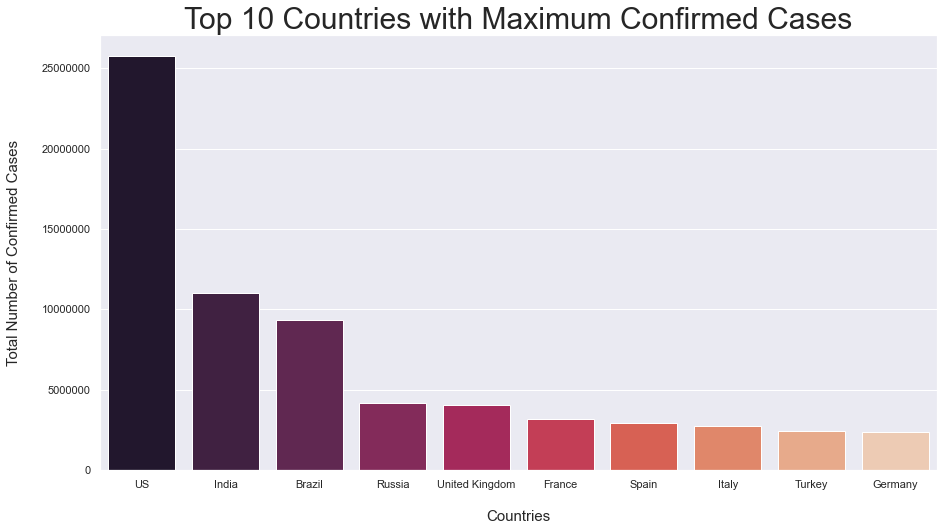

In [41]:
sns.set(rc={'figure.figsize':(15,8)},style="darkgrid", color_codes=True)
pal = sns.color_palette("rocket", len(top_10_cnf['sum']))
rank = top_10_cnf['sum'].argsort().argsort()
ax = sns.barplot(x=top_10_cnf['Country_Region'], y=top_10_cnf['sum'], palette=np.array(pal[::-1])[rank])
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('\nCountries',size=15)
ax.set_ylabel('Total Number of Confirmed Cases\n', size=15)
plt.title("Top 10 Countries with Maximum Confirmed Cases", size=30) 

US


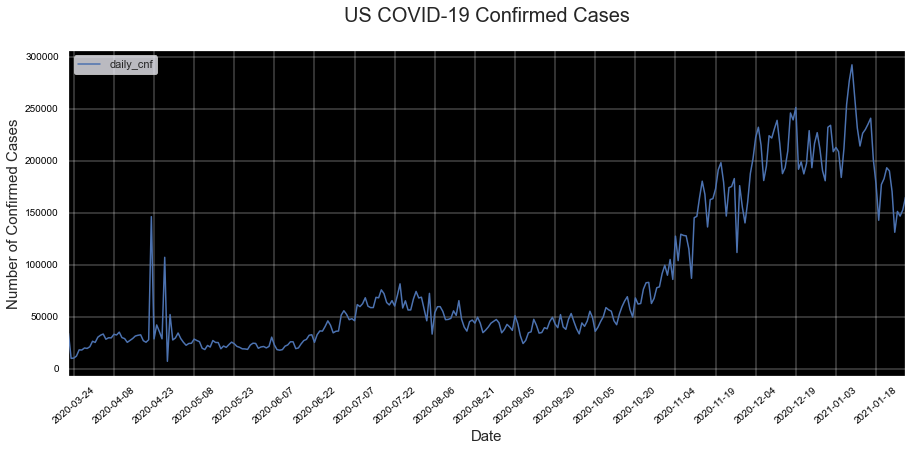


India


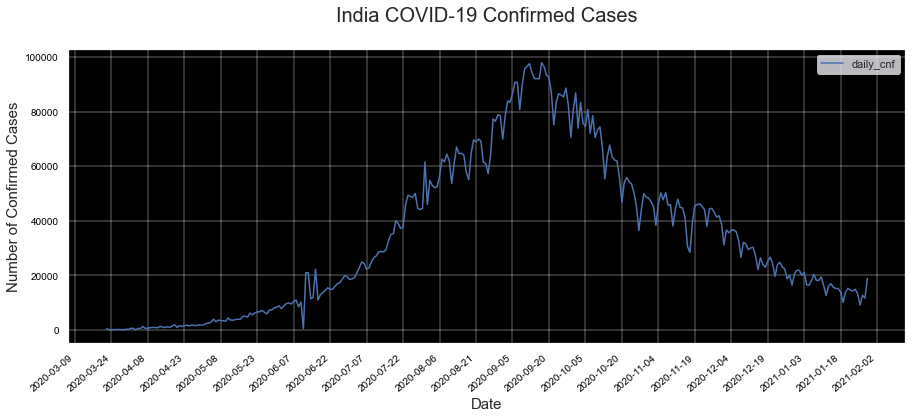


Brazil


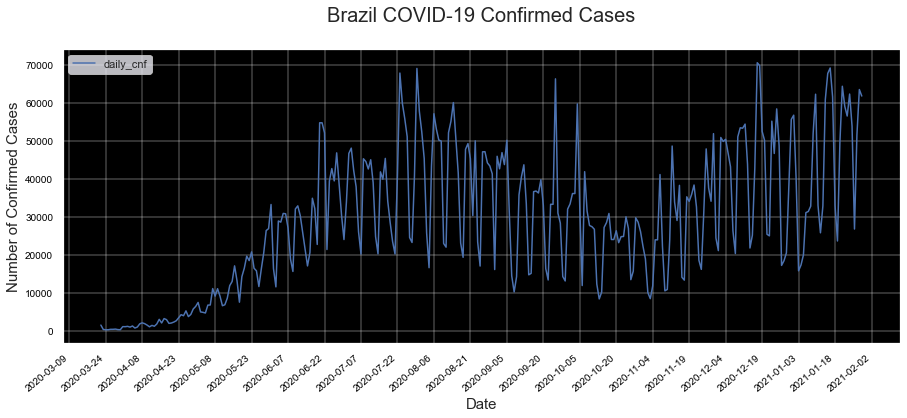


Russia


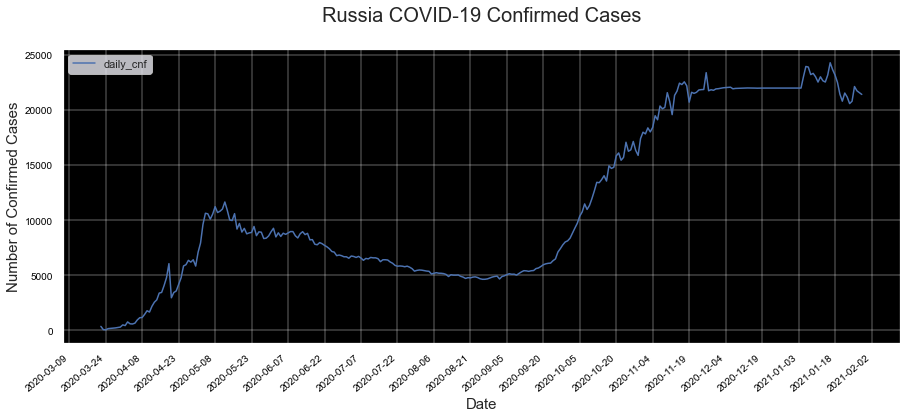


United Kingdom


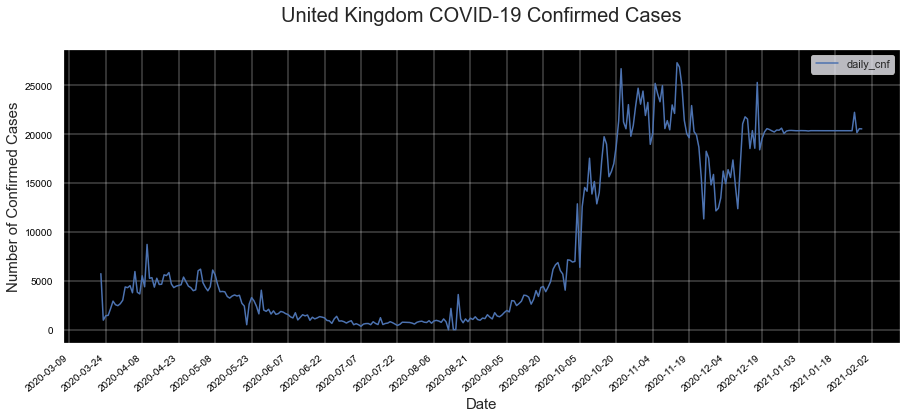


France


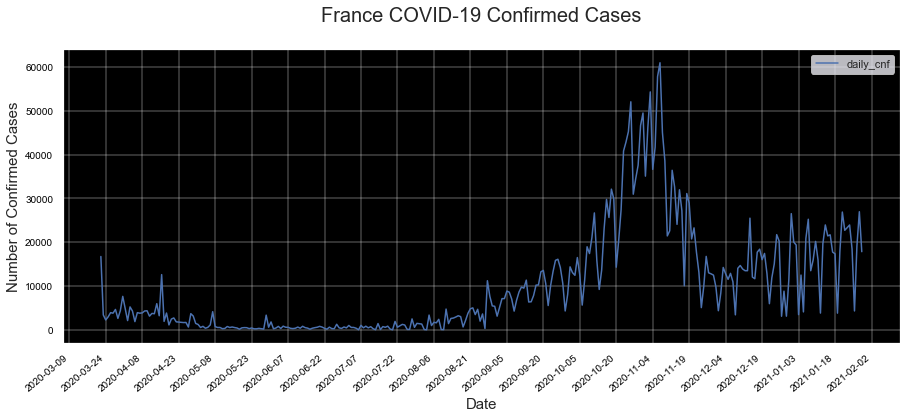


Spain


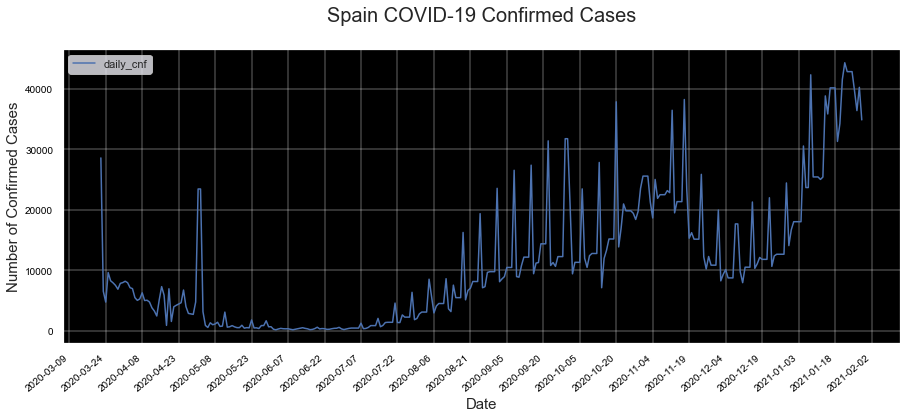


Italy


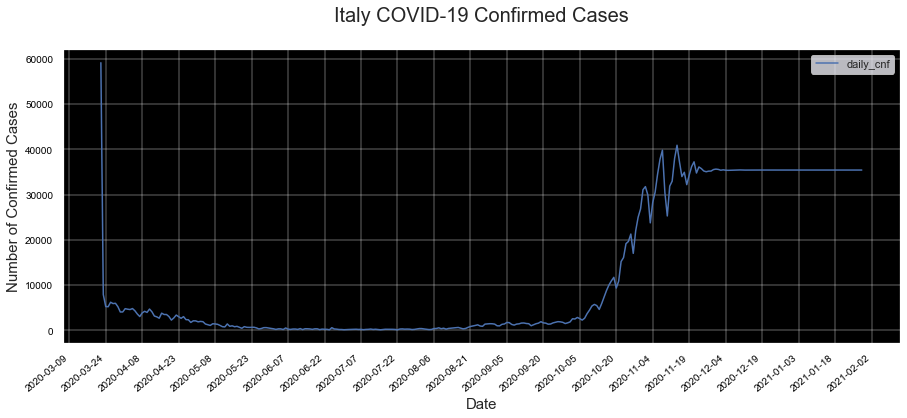


Turkey


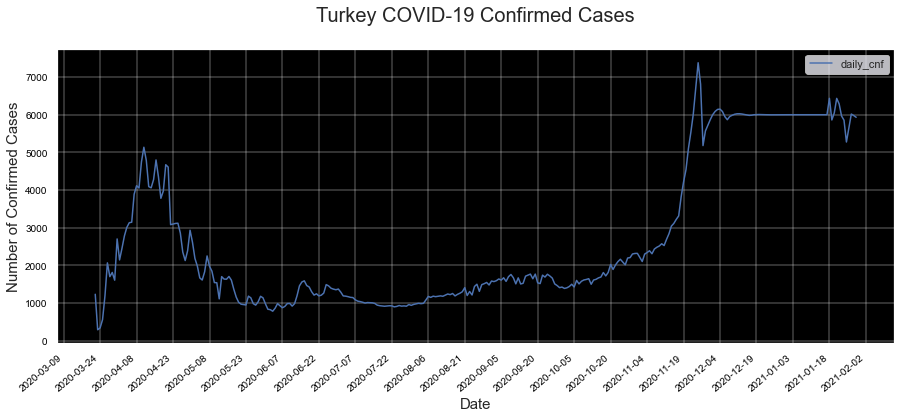


Germany


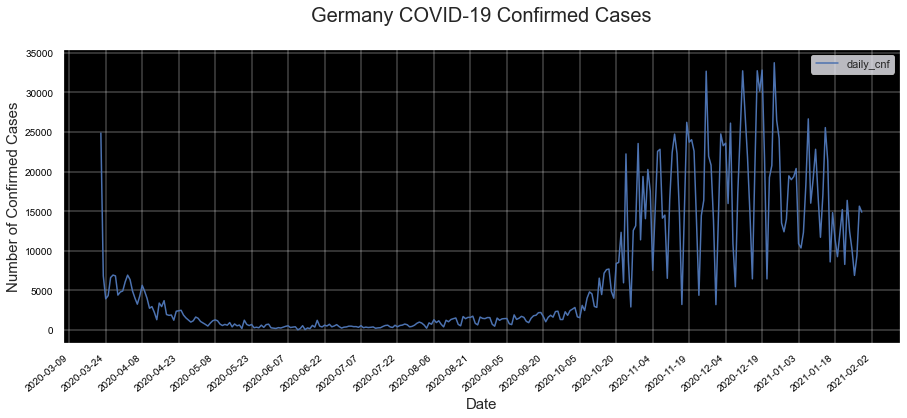

In [42]:
def Confirmed_Cases(Country):
    
    cntry = frame_asc[frame_asc["Country_Region"]== Country]
    cntry_cnf = pd.DataFrame((cntry.groupby(['Date']).Confirmed.agg([sum])).reset_index())
    
    temp = cntry_cnf['sum'].copy()
    daily_cnf = abs(np.r_[temp[0], np.diff(temp)])
    
    daily_cnf = pd.DataFrame(data=daily_cnf, columns = ['A'])
    daily_cnf['A'] = daily_cnf['A'].replace(to_replace=0, method='ffill').values
    
    for i in range(len(abs(daily_cnf))):
        if (abs(daily_cnf['A'].diff()))[i]>np.nanpercentile(abs(daily_cnf['A'].diff()),97):
            #print(i)
            if i>10:
                daily_cnf['A'][i] = np.mean(daily_cnf['A'][(i-10):(i-1)])
            else:
                daily_cnf['A'][i] = np.mean(daily_cnf['A'][(i-1):(i-10)])

    cntry_cnf['daily_cnf'] = daily_cnf['A']
    cntry_cnf.drop(['sum'],axis=1,inplace=True)
    cntry_cnf.set_index("Date", inplace = True)
    
    sns.set(rc={'figure.figsize':(15,6)})
    ax = cntry_cnf.plot()
    ax.grid(linewidth=0.4)
    ax.set_facecolor("black")
    ax.set_xlabel('Date',size=15)
    ax.set_ylabel('Number of Confirmed Cases', size=15)
    plt.xticks(rotation=40,size='10',color='black')
    plt.yticks(size=10,color='black')
    myFmt = mdates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
    ax.yaxis.get_major_formatter().set_scientific(False)
    plt.title(Country + " COVID-19 Confirmed Cases\n", size=20) 
    plt.show()
    
for i in range(len(top_10_cnf['Country_Region'].values)):
    print(top_10_cnf['Country_Region'].values[i])
    Confirmed_Cases(top_10_cnf['Country_Region'].values[i])
    print()

## Death Cases

In [43]:
# Deaths
fig = px.choropleth(full_latest_grouped, locations="Country_Region", 
                    locationmode='country names', color=np.log(full_latest_grouped["Deaths"]), 
                    hover_name="Country_Region", hover_data=['Deaths'],
                    color_continuous_scale="peach", 
                    title='Countries with Deaths Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

<IPython.core.display.Javascript object>

C:\Users\sacni\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



In [44]:
death = pd.DataFrame((df.groupby(['Country_Region']).Deaths.agg([sum])).reset_index())
top_10_dth = death.sort_values(['sum'], ascending = (False)).head(10)
top_10_dth['Country_Region'].values

array(['US', 'Brazil', 'India', 'Mexico', 'United Kingdom', 'Italy',
       'Spain', 'Russia', 'France', 'Germany'], dtype=object)

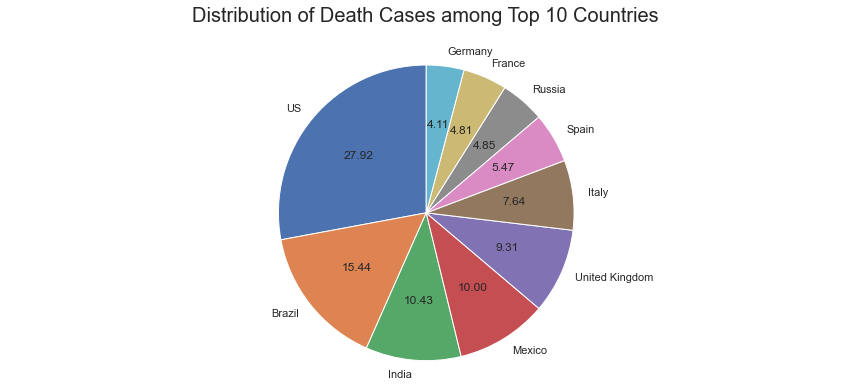

In [45]:
pieLabels = top_10_dth['Country_Region'].head(10)
populationShare = top_10_dth['sum'].head(10)
figureObject, axesObject = plt.subplots()
axesObject.pie(populationShare, labels=pieLabels, autopct='%1.2f', startangle=90)
axesObject.axis('equal')
plt.title("Distribution of Death Cases among Top 10 Countries\n", size=20)
plt.show()

Text(0.5, 1.0, 'Top 10 Countries with Maximum Deaths')

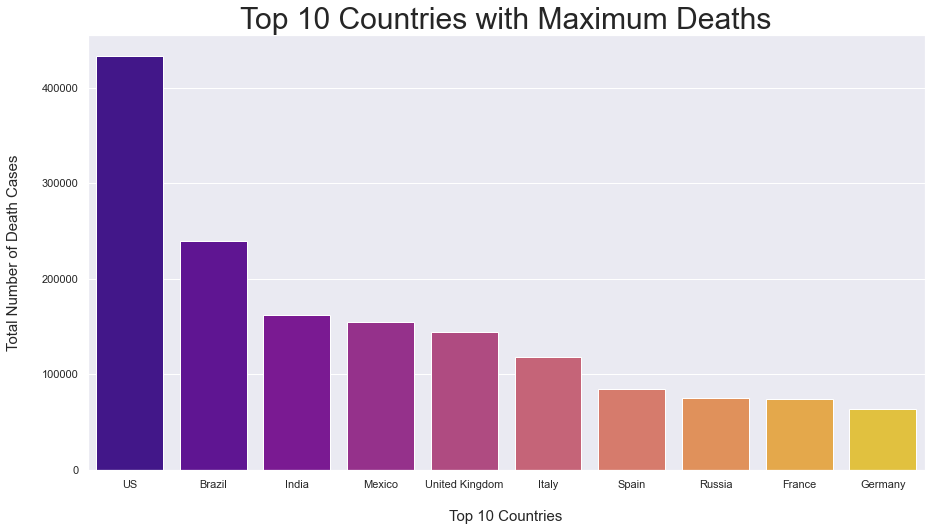

In [46]:
sns.set(rc={'figure.figsize':(15,8)},style="darkgrid", color_codes=True)
pal = sns.color_palette("plasma_r", len(top_10_dth['sum']))
rank = top_10_dth['sum'].argsort().argsort()
ax = sns.barplot(x=top_10_dth['Country_Region'], y=top_10_dth['sum'], palette=np.array(pal[::1])[rank])
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('\nTop 10 Countries',size=15)
ax.set_ylabel('Total Number of Death Cases\n', size=15)
plt.title("Top 10 Countries with Maximum Deaths", size=30) 

US


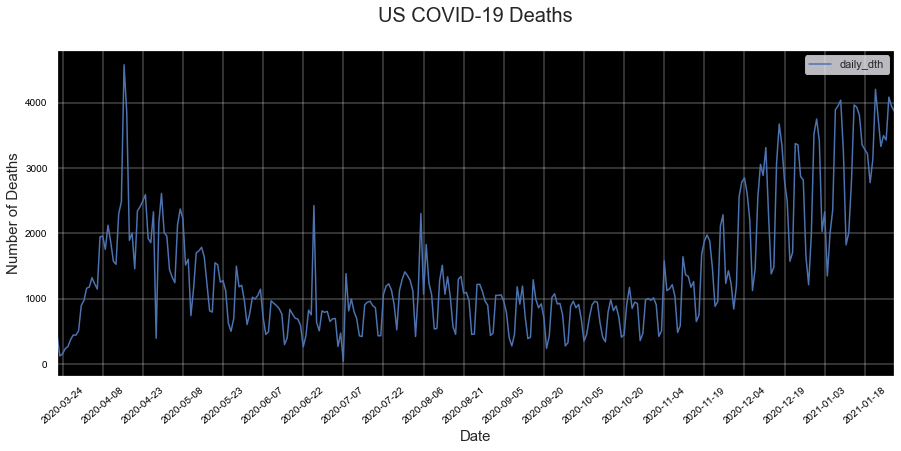


Brazil


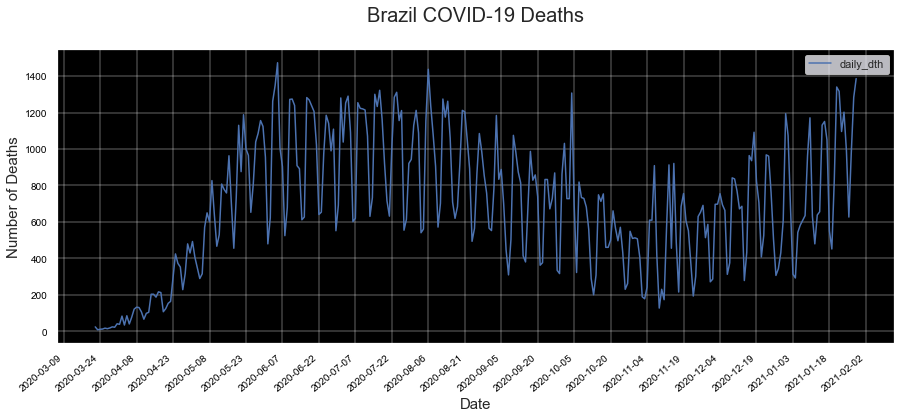


India


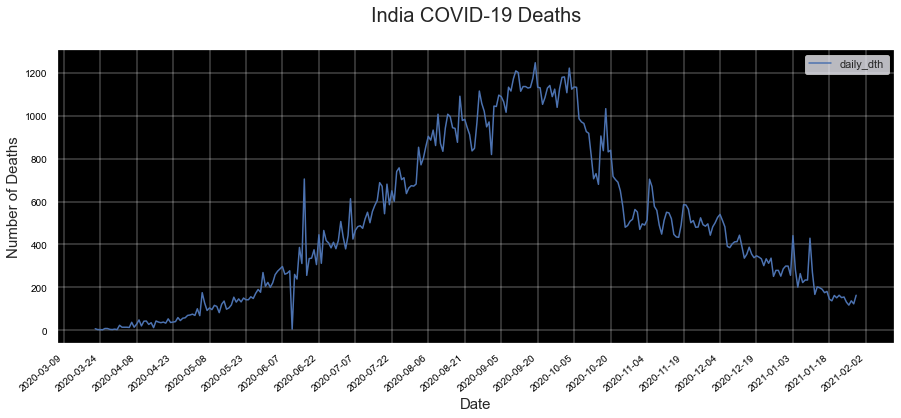


Mexico


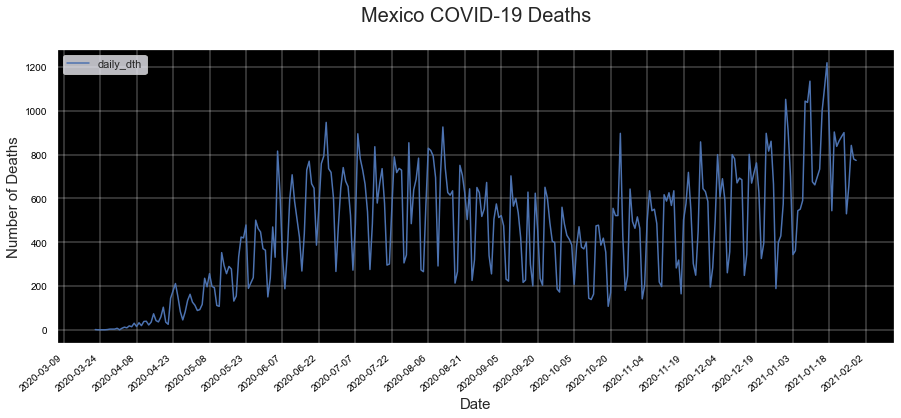


United Kingdom


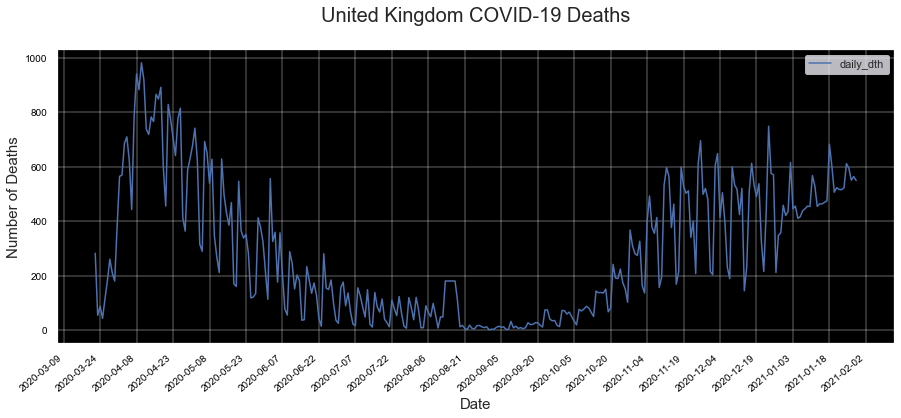


Italy


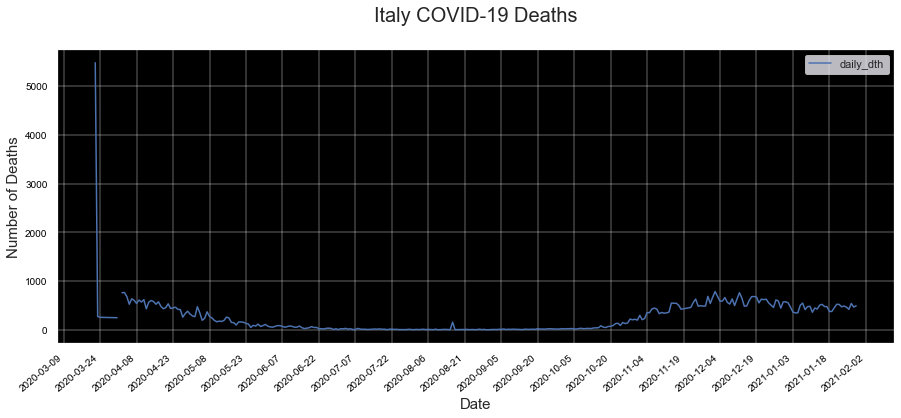


Spain


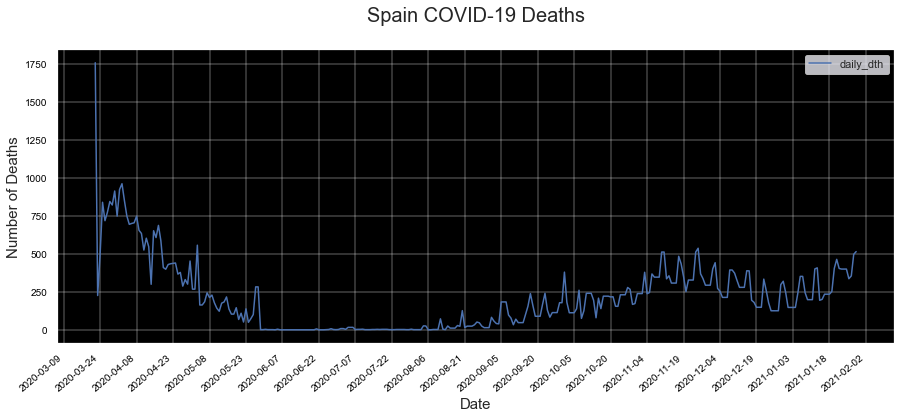


Russia


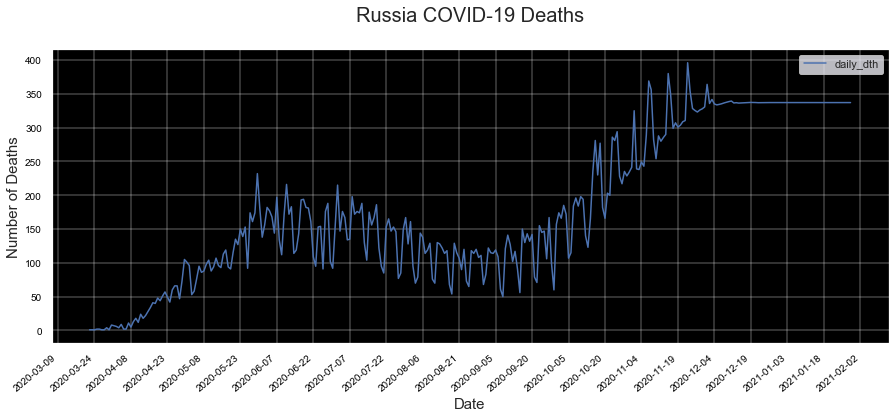


France


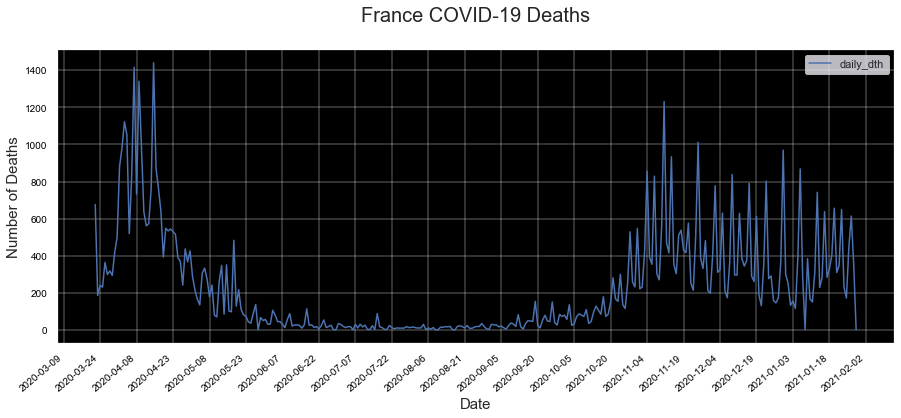


Germany


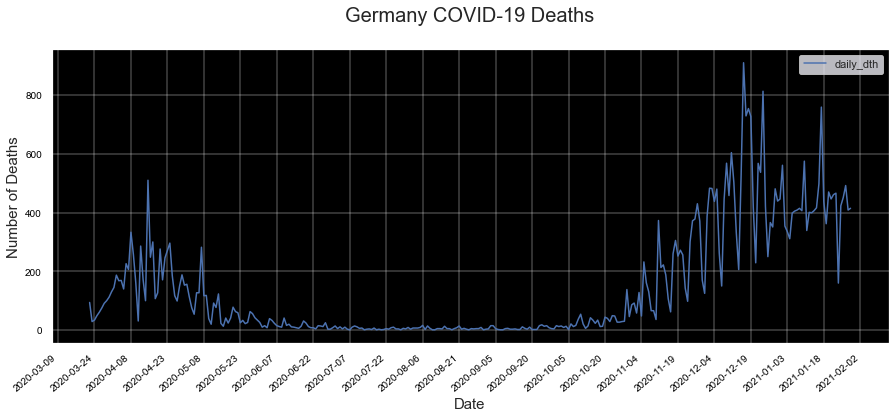

In [47]:
def Deaths(Country):
    
    cntry = frame_asc[frame_asc["Country_Region"]== Country]
    cntry_dth = pd.DataFrame((cntry.groupby(['Date']).Deaths.agg([sum])).reset_index())
    
    temp = cntry_dth['sum'].copy()
    daily_dth = abs(np.r_[temp[0], np.diff(temp)])
    
    daily_dth = pd.DataFrame(data=daily_dth, columns = ['A'])
    daily_dth['A'] = daily_dth['A'].replace(to_replace=0, method='ffill').values
    
    for i in range(len(abs(daily_dth))):
        if (abs(daily_dth['A'].diff()))[i]>np.nanpercentile(abs(daily_dth['A'].diff()),97):
            #print(i)
            if i>10:
                daily_dth['A'][i] = np.mean(daily_dth['A'][(i-10):(i-1)])
            else:
                daily_dth['A'][i] = np.mean(daily_dth['A'][(i-1):(i-10)])

    cntry_dth['daily_dth'] = daily_dth['A']
    cntry_dth.drop(['sum'],axis=1,inplace=True)
    cntry_dth.set_index("Date", inplace = True)
    
    sns.set(rc={'figure.figsize':(15,6)})
    ax = cntry_dth.plot()
    ax.grid(linewidth=0.4)
    ax.set_facecolor("black")
    ax.set_xlabel('Date',size=15)
    ax.set_ylabel('Number of Deaths', size=15)
    plt.xticks(rotation=40,size='10',color='black')
    plt.yticks(size=10,color='black')
    myFmt = mdates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
    ax.yaxis.get_major_formatter().set_scientific(False)
    plt.title(Country + " COVID-19 Deaths\n", size=20) 
    plt.show()
    
for i in range(len(top_10_dth['Country_Region'].values)):
    print(top_10_dth['Country_Region'].values[i])
    Deaths(top_10_dth['Country_Region'].values[i])
    print()

## Active Cases

In [48]:
# Active Cases
fig = px.choropleth(full_latest_grouped, locations="Country_Region", 
                    locationmode='country names', color=np.log(full_latest_grouped["Active"]), 
                    hover_name="Country_Region", hover_data=['Active'],
                    color_continuous_scale="peach", 
                    title='Countries with Active Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

<IPython.core.display.Javascript object>

C:\Users\sacni\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



In [49]:
act = pd.DataFrame((df.groupby(['Country_Region']).Active.agg([sum])).reset_index())
top_10_act = act.sort_values(['sum'], ascending = (False)).head(10)
top_10_act['Country_Region'].values

array(['US', 'United Kingdom', 'France', 'Spain', 'Belgium', 'Brazil',
       'Netherlands', 'Russia', 'Sweden', 'Italy'], dtype=object)

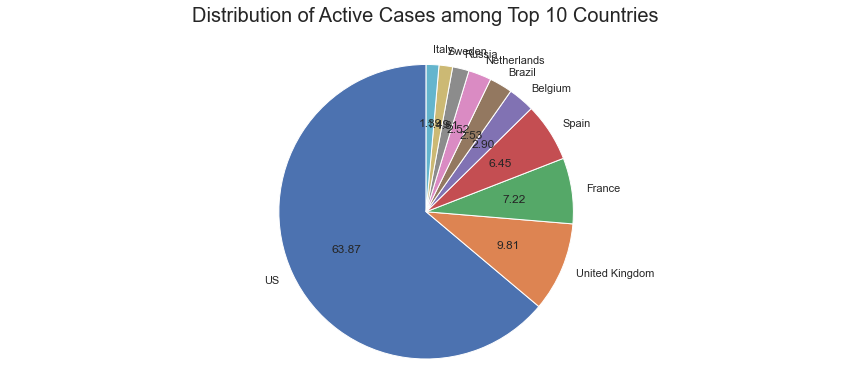

In [50]:
pieLabels = top_10_act['Country_Region'].head(10)
populationShare = top_10_act['sum'].head(10)
figureObject, axesObject = plt.subplots()
axesObject.pie(populationShare, labels=pieLabels, autopct='%1.2f', startangle=90)
axesObject.axis('equal')
plt.title("Distribution of Active Cases among Top 10 Countries\n", size=20)
plt.show()

Text(0, 0.5, 'Total Number of Active Cases\n')

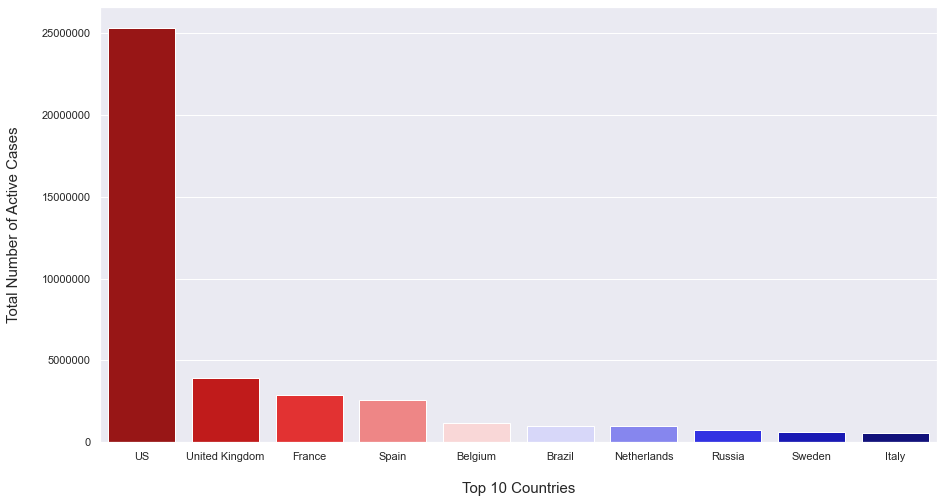

In [51]:
sns.set(rc={'figure.figsize':(15,8)},style="darkgrid", color_codes=True)
pal = sns.color_palette("seismic", len(top_10_act['sum']))
rank = top_10_act['sum'].argsort().argsort()
ax = sns.barplot(x=top_10_act['Country_Region'], y=top_10_act['sum'], palette=np.array(pal[::1])[rank])
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('\nTop 10 Countries',size=15)
ax.set_ylabel('Total Number of Active Cases\n', size=15)

US


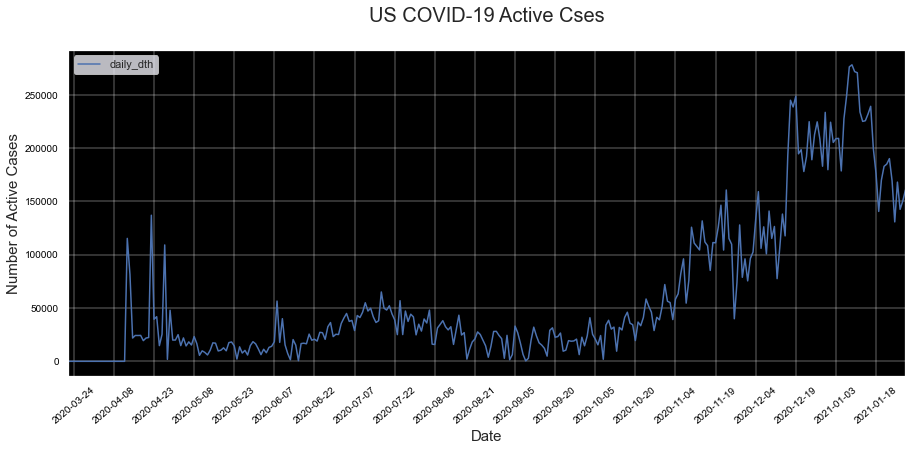


United Kingdom


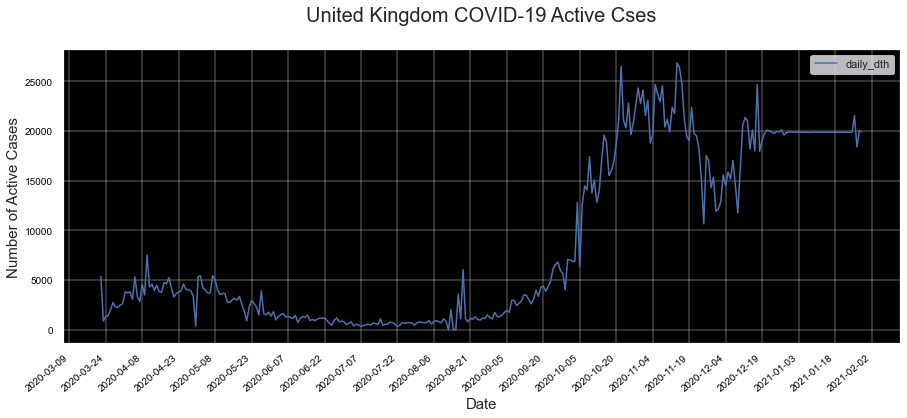


France


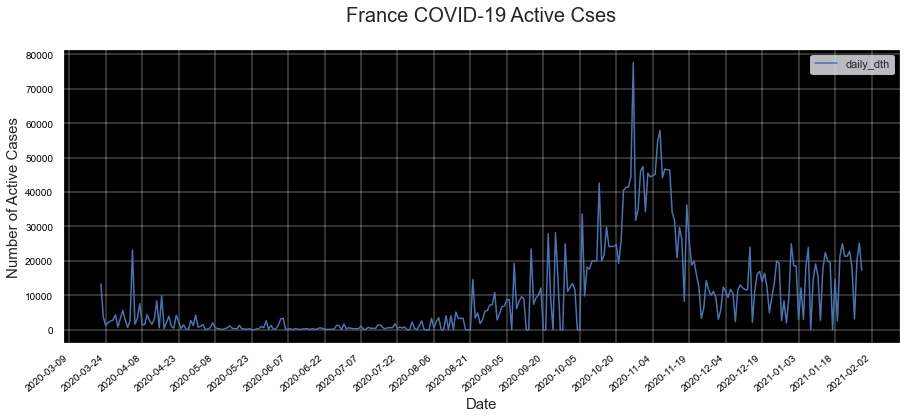


Spain


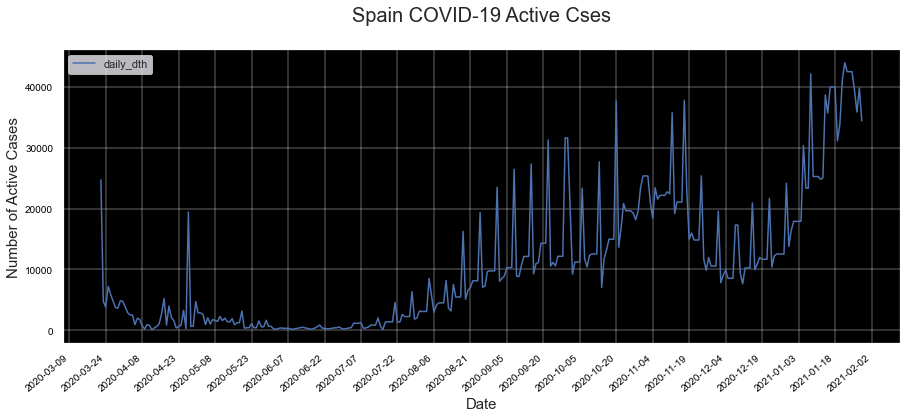


Belgium


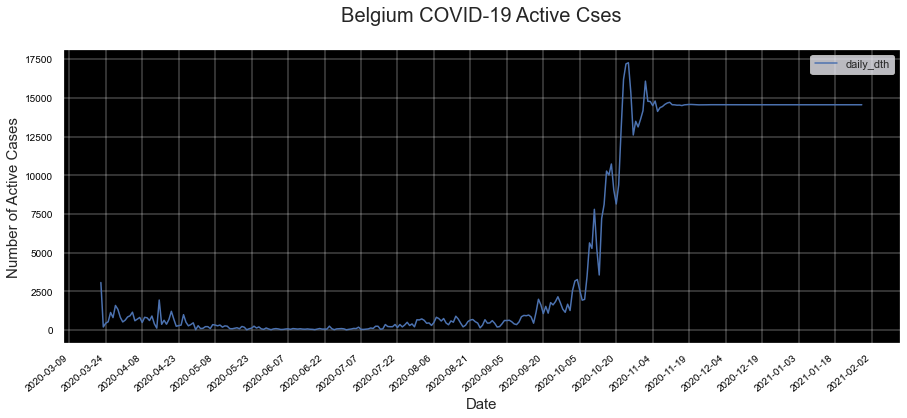


Brazil


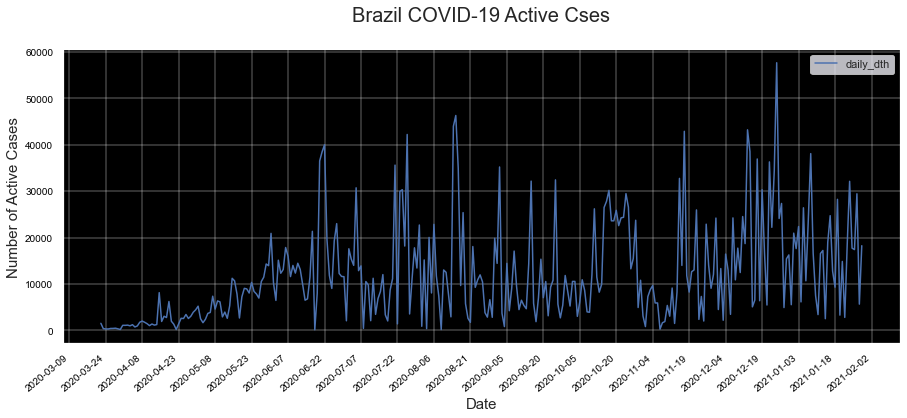


Netherlands


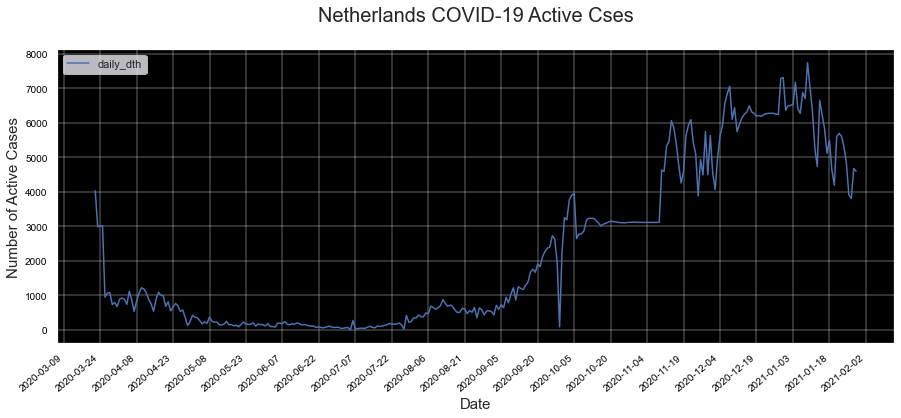


Russia


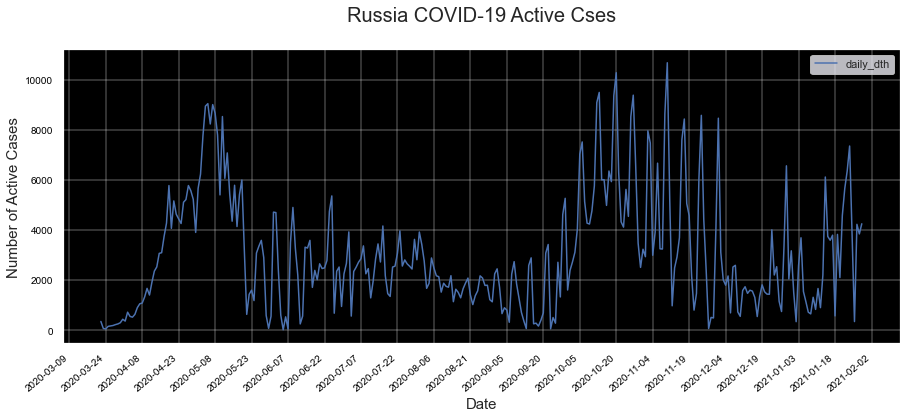


Sweden


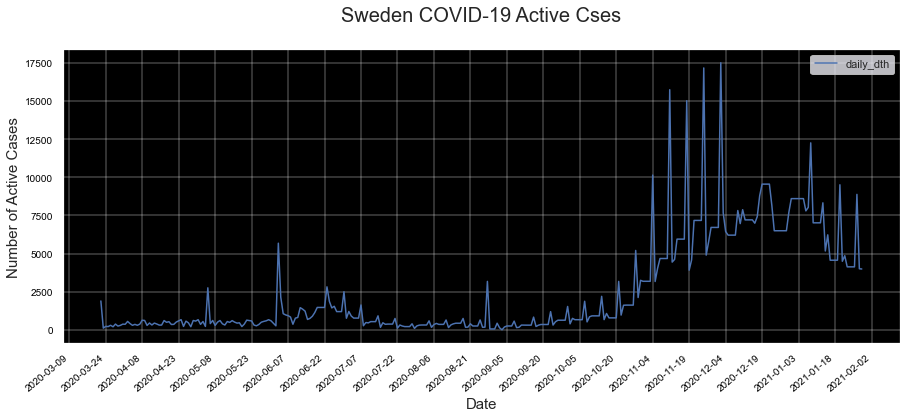


Italy


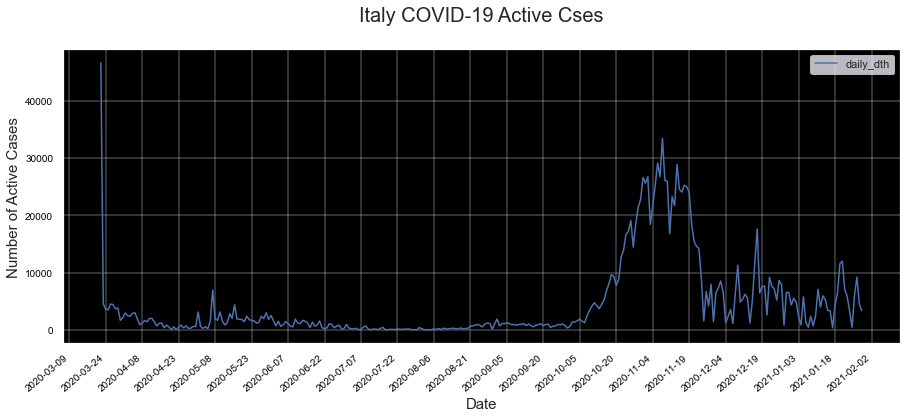

In [52]:
def Active(Country):
    
    cntry = frame_asc[frame_asc["Country_Region"]== Country]
    cntry_act = pd.DataFrame((cntry.groupby(['Date']).Active.agg([sum])).reset_index())
    
    temp = cntry_act['sum'].copy()
    daily_act = abs(np.r_[temp[0], np.diff(temp)])
    
    daily_act = pd.DataFrame(data=daily_act, columns = ['A'])
    daily_act['A'] = daily_act['A'].replace(to_replace=0, method='ffill').values
    
    for i in range(len(abs(daily_act))):
        if (abs(daily_act['A'].diff()))[i]>np.nanpercentile(abs(daily_act['A'].diff()),97):
            #print(i)
            if i>10:
                daily_act['A'][i] = np.mean(daily_act['A'][(i-10):(i-1)])
            else:
                daily_act['A'][i] = np.mean(daily_act['A'][(i-1):(i-10)])

    cntry_act['daily_dth'] = daily_act['A']
    cntry_act.drop(['sum'],axis=1,inplace=True)
    cntry_act.set_index("Date", inplace = True)
    
    sns.set(rc={'figure.figsize':(15,6)})
    ax = cntry_act.plot()
    ax.grid(linewidth=0.4)
    ax.set_facecolor("black")
    ax.set_xlabel('Date',size=15)
    ax.set_ylabel('Number of Active Cases', size=15)
    plt.xticks(rotation=40,size='10',color='black')
    plt.yticks(size=10,color='black')
    myFmt = mdates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
    ax.yaxis.get_major_formatter().set_scientific(False)
    plt.title(Country + " COVID-19 Active Cses\n", size=20) 
    plt.show()
    
for i in range(len(top_10_act['Country_Region'].values)):
    print(top_10_act['Country_Region'].values[i])
    Active(top_10_act['Country_Region'].values[i])
    print()

## Recoverd Cases

In [53]:
# Recovered
fig = px.choropleth(full_latest_grouped, locations="Country_Region", 
                    locationmode='country names', color=np.log(full_latest_grouped["Recovered"]), 
                    hover_name="Country_Region", hover_data=['Recovered'],
                    color_continuous_scale="peach", 
                    title='Countries with Recovered Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

<IPython.core.display.Javascript object>

C:\Users\sacni\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



In [54]:
rcv = pd.DataFrame((df.groupby(['Country_Region']).Recovered.agg([sum])).reset_index())
top_10_rcv = rcv.sort_values(['sum'], ascending = (False)).head(10)
top_10_rcv['Country_Region'].values

array(['India', 'Brazil', 'Russia', 'Turkey', 'Italy', 'Germany',
       'Colombia', 'Argentina', 'Mexico', 'South Africa'], dtype=object)

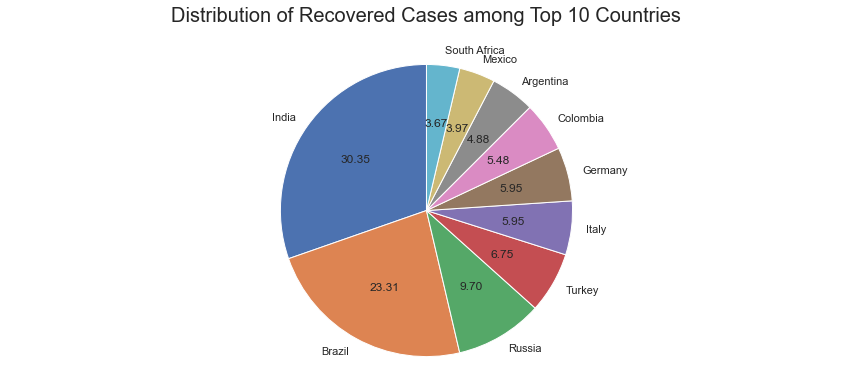

In [55]:
pieLabels = top_10_rcv['Country_Region'].head(10)
populationShare = top_10_rcv['sum'].head(10)
figureObject, axesObject = plt.subplots()
axesObject.pie(populationShare, labels=pieLabels, autopct='%1.2f', startangle=90)
axesObject.axis('equal')
plt.title("Distribution of Recovered Cases among Top 10 Countries\n", size=20)
plt.show()

Text(0, 0.5, 'Total Number of Recovered Cases\n')

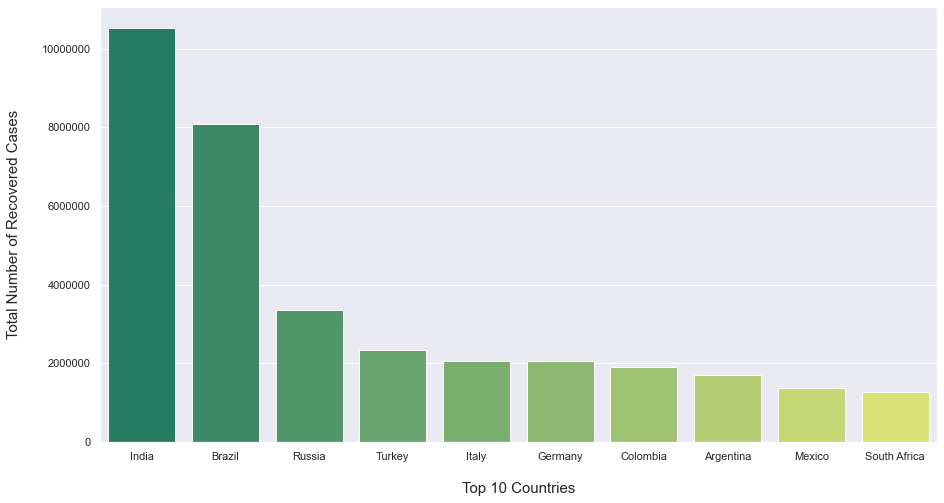

In [56]:
sns.set(rc={'figure.figsize':(15,8)},style="darkgrid", color_codes=True)
pal = sns.color_palette("summer", len(top_10_rcv['sum']))
rank = top_10_rcv['sum'].argsort().argsort()
ax = sns.barplot(x=top_10_rcv['Country_Region'], y=top_10_rcv['sum'], palette=np.array(pal[::-1])[rank])
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('\nTop 10 Countries',size=15)
ax.set_ylabel('Total Number of Recovered Cases\n', size=15)

India


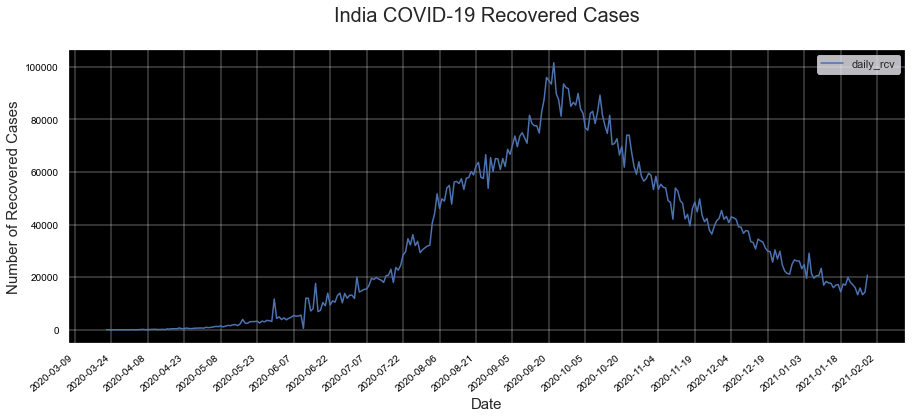


Brazil


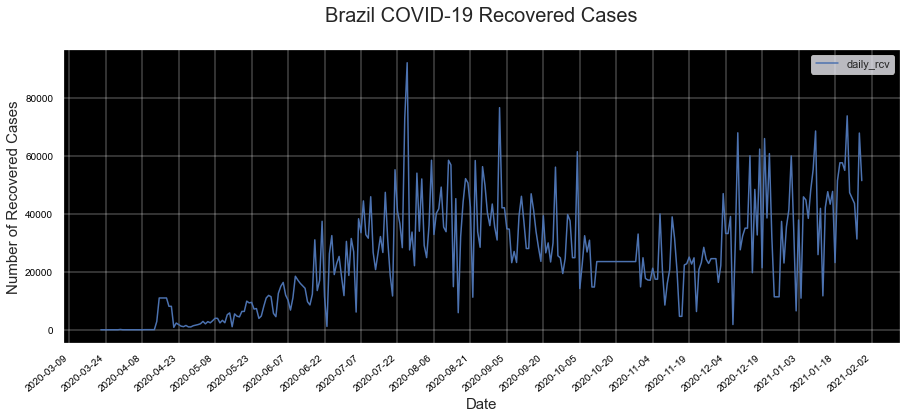


Russia


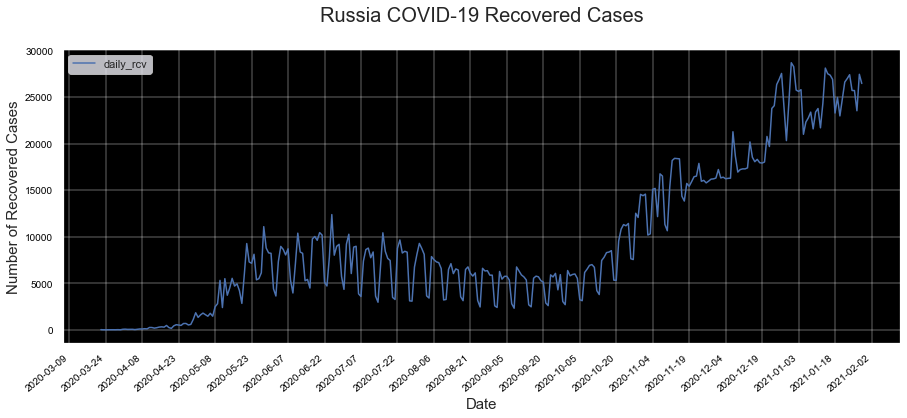


Turkey


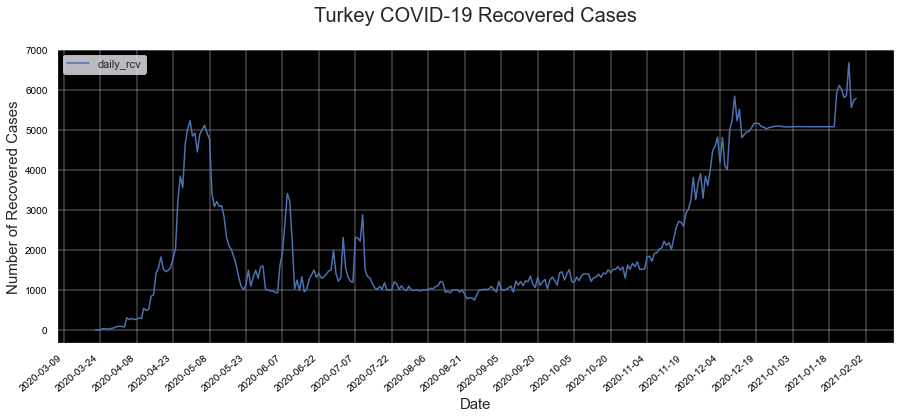


Italy


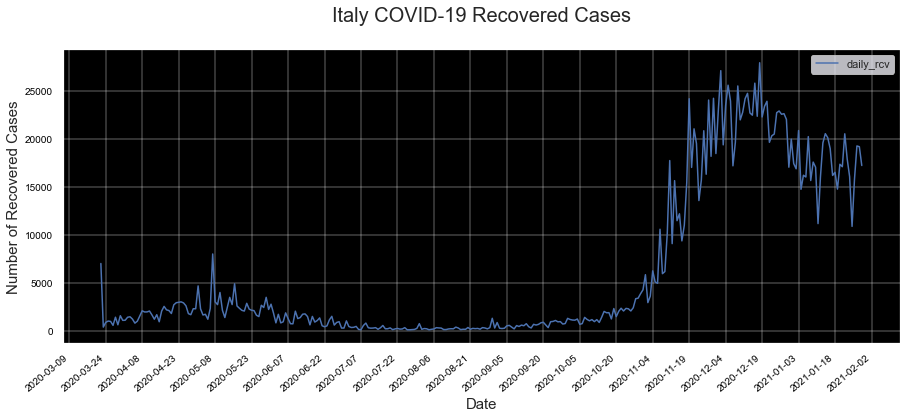


Germany


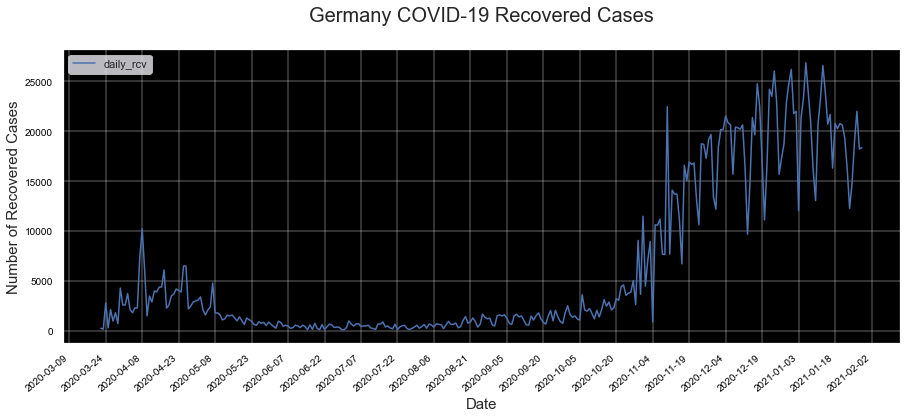


Colombia


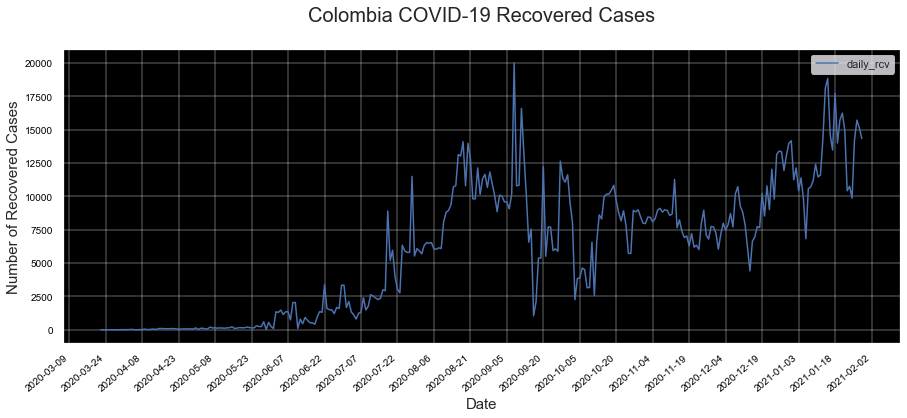


Argentina


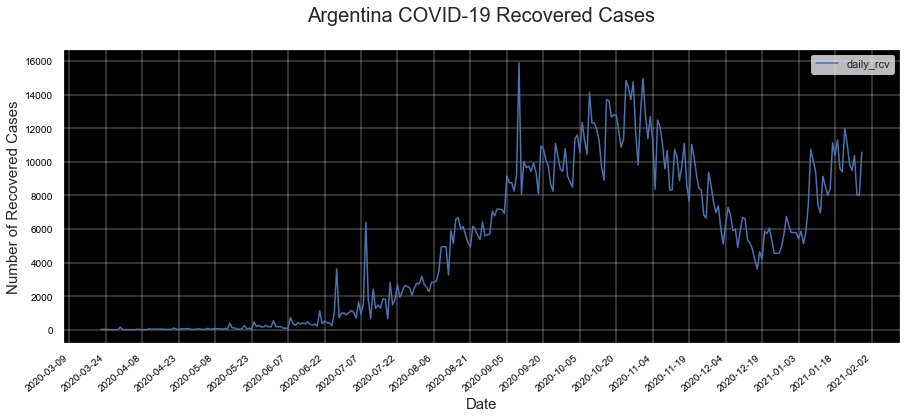


Mexico


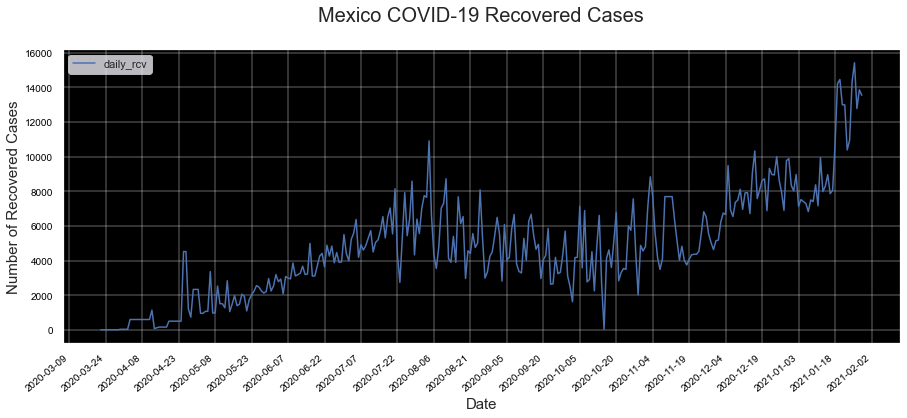


South Africa


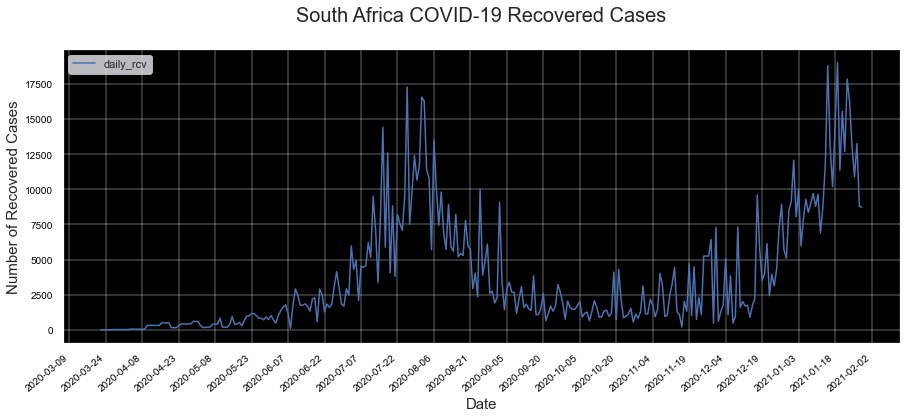

In [57]:
def Recovered(Country):
    
    cntry = frame_asc[frame_asc["Country_Region"]== Country]
    cntry_rcv = pd.DataFrame((cntry.groupby(['Date']).Recovered.agg([sum])).reset_index())
    
    temp = cntry_rcv['sum'].copy()
    daily_rcv = abs(np.r_[temp[0], np.diff(temp)])
    
    daily_rcv = pd.DataFrame(data=daily_rcv, columns = ['A'])
    daily_rcv['A'] = daily_rcv['A'].replace(to_replace=0, method='ffill').values
    
    for i in range(len(abs(daily_rcv))):
        if (abs(daily_rcv['A'].diff()))[i]>np.nanpercentile(abs(daily_rcv['A'].diff()),97):
            #print(i)
            if i>10:
                daily_rcv['A'][i] = np.mean(daily_rcv['A'][(i-10):(i-1)])
            else:
                daily_rcv['A'][i] = np.mean(daily_rcv['A'][(i-1):(i-10)])

    cntry_rcv['daily_rcv'] = daily_rcv['A']
    cntry_rcv.drop(['sum'],axis=1,inplace=True)
    cntry_rcv.set_index("Date", inplace = True)
    
    sns.set(rc={'figure.figsize':(15,6)})
    ax = cntry_rcv.plot()
    ax.grid(linewidth=0.4)
    ax.set_facecolor("black")
    ax.set_xlabel('Date',size=15)
    ax.set_ylabel('Number of Recovered Cases', size=15)
    plt.xticks(rotation=40,size='10',color='black')
    plt.yticks(size=10,color='black')
    myFmt = mdates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
    ax.yaxis.get_major_formatter().set_scientific(False)
    plt.title(Country + " COVID-19 Recovered Cases\n", size=20) 
    plt.show()
    
for i in range(len(top_10_rcv['Country_Region'].values)):
    print(top_10_rcv['Country_Region'].values[i])
    Recovered(top_10_rcv['Country_Region'].values[i])
    print()

# Month-Wise

In [58]:
temp = frame.copy()
temp_list = temp.groupby('month_year').Date.agg(max).reset_index()

date_wise = frame[frame['Date'].isin(temp_list['Date'])]
month_wise_data = date_wise.groupby('month_year')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp_f = month_wise_data.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f[['month_year', 'Confirmed', 'Active', 'Deaths', 'Recovered']]
temp_f = temp_f.reset_index(drop=True)

temp_f.style.background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
            .background_gradient(cmap="Greens", subset=['Recovered'])\
            .background_gradient(cmap="Reds", subset=['Deaths'])

<ipython-input-58-8a6134e765f0>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [59]:
for i in range(len(temp_f)):
    if i<11:
        temp_f['Confirmed'][i] = temp_f['Confirmed'][i]-temp_f['Confirmed'][i+1]
        temp_f['Active'][i] = temp_f['Active'][i]-temp_f['Active'][i+1]
        temp_f['Deaths'][i] = temp_f['Deaths'][i]-temp_f['Deaths'][i+1]
        temp_f['Recovered'][i] = temp_f['Recovered'][i]-temp_f['Recovered'][i+1]

<ipython-input-59-361ddb43d3af>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-361ddb43d3af>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-361ddb43d3af>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-361ddb43d3af>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [60]:
temp_f.set_index("month_year", inplace = True)

In [61]:
temp_f.style.background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
            .background_gradient(cmap="Greens", subset=['Recovered'])\
            .background_gradient(cmap="Reds", subset=['Deaths'])

<AxesSubplot:xlabel='month_year'>

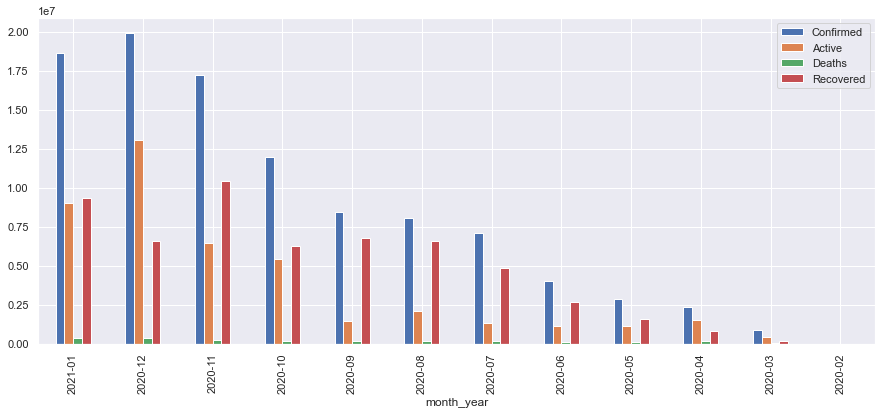

In [62]:
temp_f.plot(kind='bar')

<AxesSubplot:xlabel='month_year'>

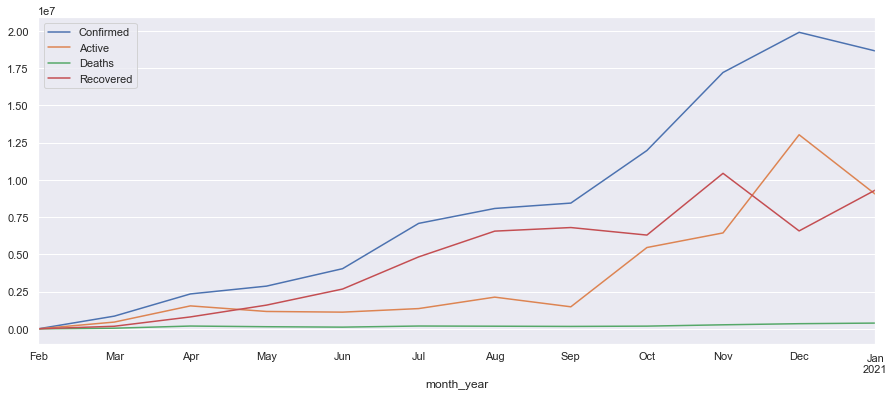

In [63]:
temp_f.plot()

### Before and After Diwali

In [64]:
Diwali =  datetime(2020, 11, 14)

In [65]:
India_Diwali = frame[(frame['Date'] > Diwali - timedelta(9)) & (frame['Date'] < Diwali + timedelta(9)) & (frame['Country_Region'] == 'India')]

In [66]:
India_Diwali.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'geometry', 'Date',
       'Month', 'Year', 'month_year'],
      dtype='object')

In [67]:
India_Diwali.drop(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_','geometry','Month', 'Year', 'month_year'], axis=1, inplace=True)

C:\Users\sacni\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
India_Diwali.reset_index(drop=True)

Confirmed  Deaths  Recovered  Active       Date
0         4403      60       4175     168 2020-11-06
1       835953    6757     807318   21878 2020-11-06
2        15244      43      13580    1621 2020-11-06
3       208054     934     199458    7662 2020-11-06
4       219349    1121     211872    6356 2020-11-06
..         ...     ...        ...     ...        ...
624      32415     366      31179     870 2020-11-22
625          0       0          0       0 2020-11-22
626     524223    7524     493228   23471 2020-11-22
627      70790    1146      65562    4082 2020-11-22
628     452770    7976     419403   25391 2020-11-22

[629 rows x 5 columns]

In [69]:
table = pd.DataFrame((India_Diwali.groupby(['Date']).agg([sum])).reset_index())
table.columns = table.columns.droplevel(1)
table = table.sort_values(by='Confirmed', ascending=False)
table.reset_index(drop=True)

Date  Confirmed  Deaths  Recovered  Active
0  2020-11-22      9e+06  133227      9e+06  440962
1  2020-11-21      9e+06  132726      8e+06  439747
2  2020-11-20      9e+06  132162      8e+06  443794
3  2020-11-19      9e+06  131578      8e+06  443303
4  2020-11-18      9e+06  130993      8e+06  446805
5  2020-11-17      9e+06  130503      8e+06  453965
6  2020-11-16      9e+06  130070      8e+06  465478
7  2020-11-15      9e+06  129635      8e+06  479216
8  2020-11-14      9e+06  129188      8e+06  480719
9  2020-11-13      9e+06  128668      8e+06  484547
10 2020-11-12      9e+06  128121      8e+06  489294
11 2020-11-11      9e+06  127571      8e+06  494657
12 2020-11-10      9e+06  127059      8e+06  505265
13 2020-11-09      9e+06  126611      8e+06  509673
14 2020-11-08      9e+06  126121      8e+06  512665
15 2020-11-07      8e+06  125562      8e+06  516632
16 2020-11-06      8e+06  124985      8e+06  520773

In [70]:
for i in range(len(table)):
    if i<16:
        table['Confirmed'][i] = abs(table['Confirmed'][i]-table['Confirmed'][i+1])
        table['Deaths'][i] = abs(table['Deaths'][i]-table['Deaths'][i+1])
        table['Recovered'][i] = abs(table['Recovered'][i]-table['Recovered'][i+1])

<ipython-input-70-38e4e7237461>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-38e4e7237461>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-38e4e7237461>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
table.drop([16,0], inplace=True)

In [72]:
table.set_index("Date", inplace = True)
table.style.background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
            .background_gradient(cmap="Greens", subset=['Recovered'])\
            .background_gradient(cmap="Reds", subset=['Deaths'])

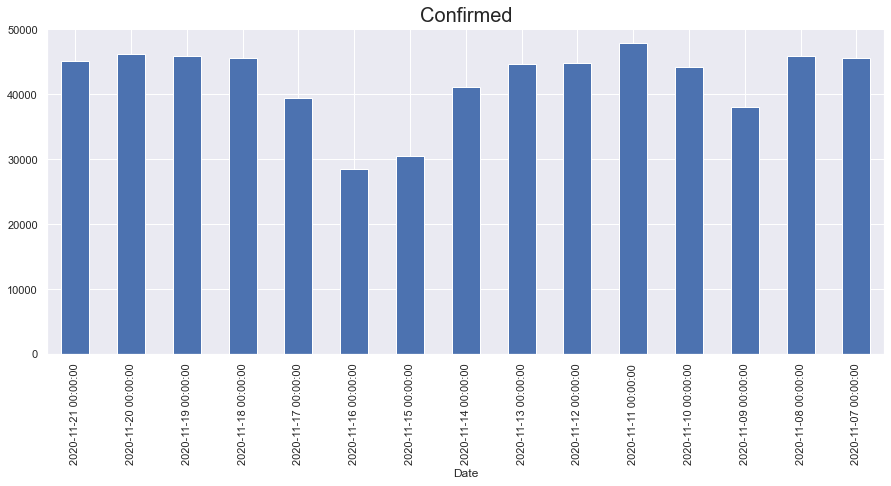

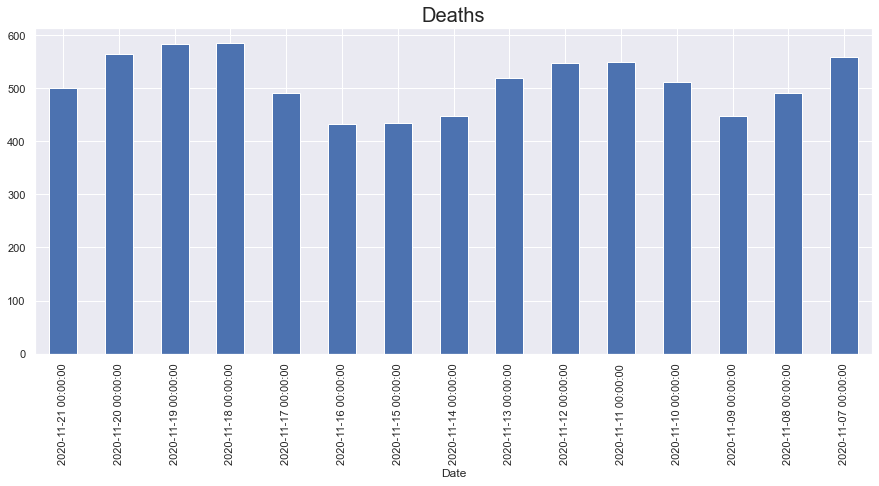

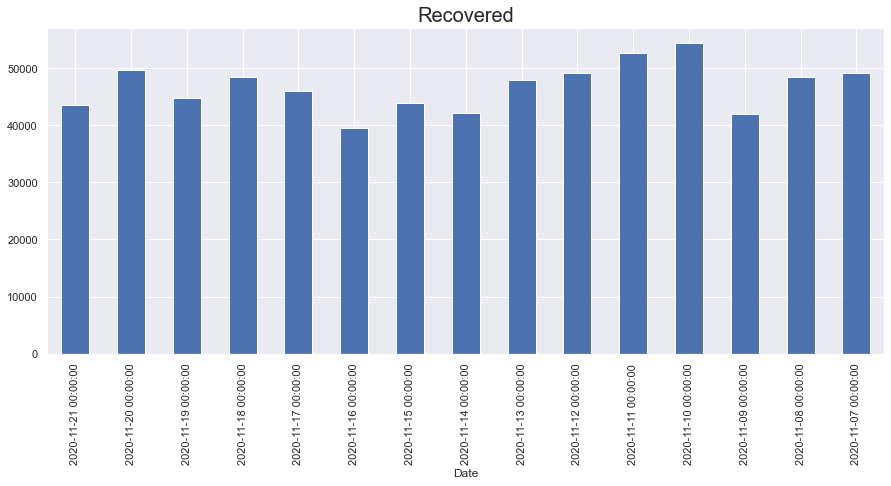

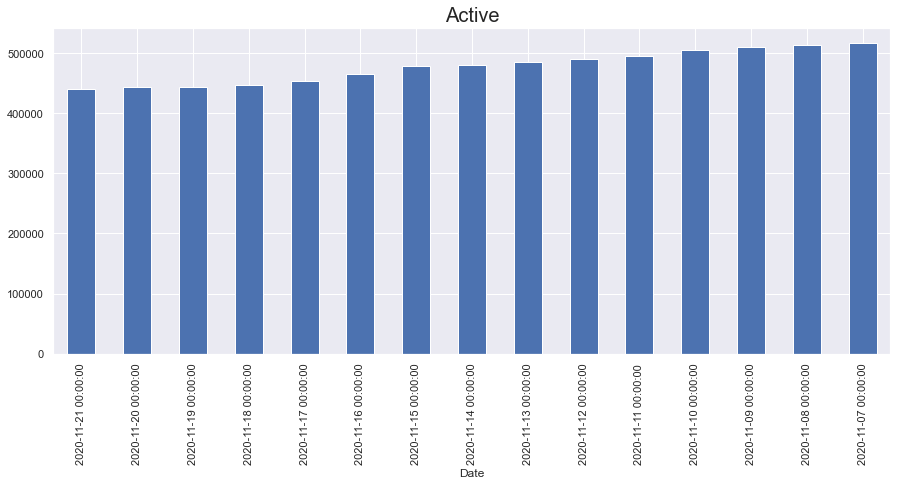

In [73]:
for i in table.columns:
    table[i].plot(kind ='bar')
    plt.title(i, size=20) 
    plt.show()

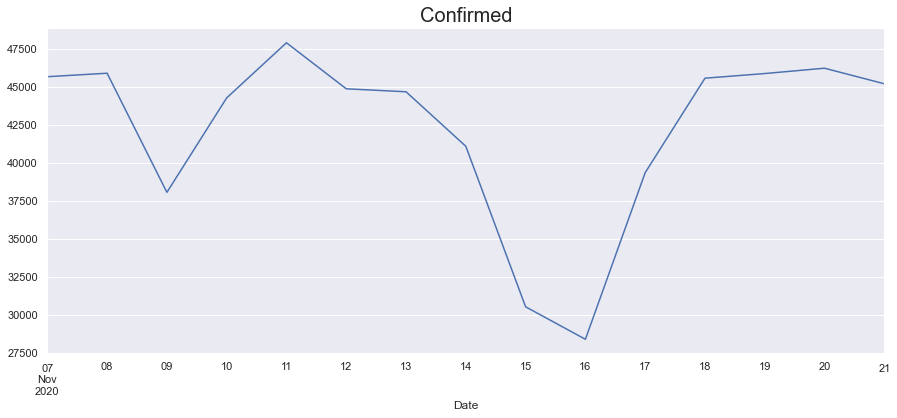

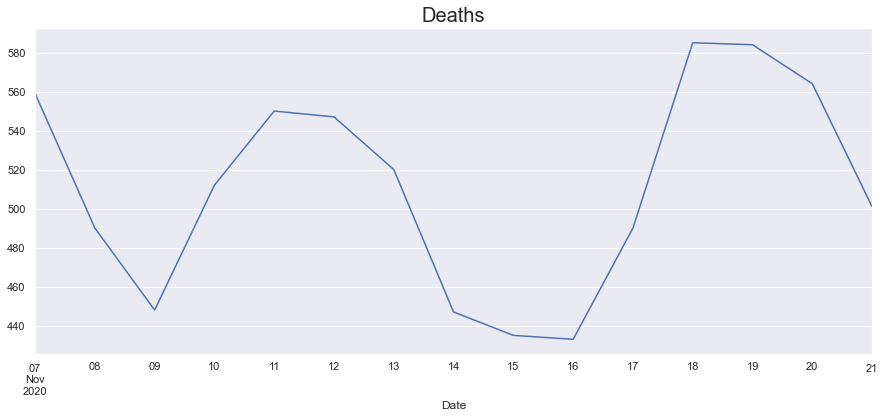

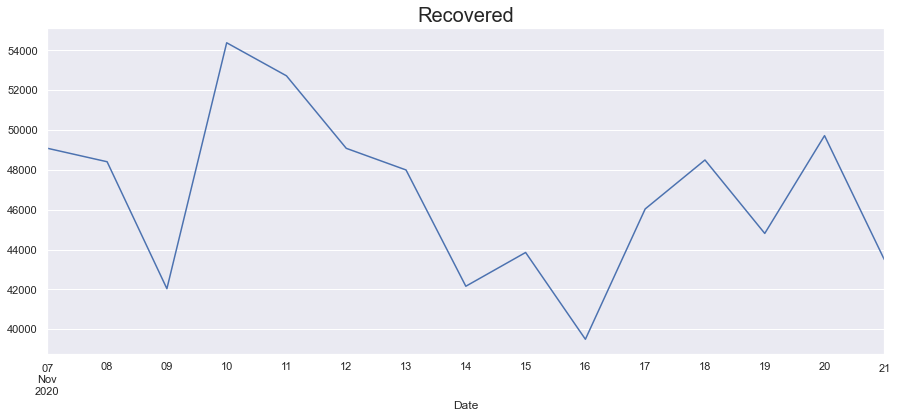

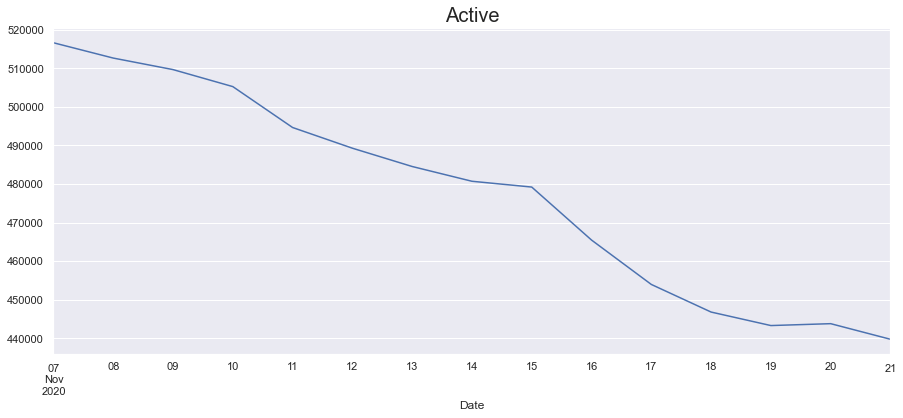

In [74]:
for i in table.columns:
    table[i].plot()
    plt.title(i, size=20) 
    plt.show()